<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [253]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [254]:
df = pd.read_csv("store_sharing.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [255]:
df.shape

(17414, 10)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [257]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [258]:
#Check if there is any duplicated row?
duplicates = df.duplicated().any()
duplicates

False

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [259]:
#map the seson dictionary to the season numerical column
#df['season'] = df['season'].map({1.0: 'summer',2.0: 'fall',3.0: 'winter', 0.0:'spring'})

df['season'].replace({3.0: 'winter',0.0: 'spring',1.0: 'summer',2.0: 'fall'}, inplace=True)

#-----------------------------------------------

#Is Holiday
df['is_holiday'].replace(1.0, 'Holiday', inplace=True)
df['is_holiday'].replace(0.0, 'Non-holiday', inplace=True)

#-----------------------------------------------

#Is_Weekend
df['is_weekend'].replace(1.0, 'Weekend', inplace=True)
df['is_weekend'].replace(0.0, 'Non-weekend', inplace=True)

#-----------------------------------------------

#Weather_Code
df['weather_code'] = df['weather_code'].replace({1.0: 'Clear',2.0: 'scattered clouds',3.0: 'Broken clouds',4.0: 'Cloudy',
                                            7.0: 'Rain',10.0: 'rain with thunderstorm', 26.0: 'snowfall',94.0: 'Freezing Fog'})

In [260]:
df.season.value_counts()

spring    4394
summer    4387
winter    4330
fall      4303
Name: season, dtype: int64

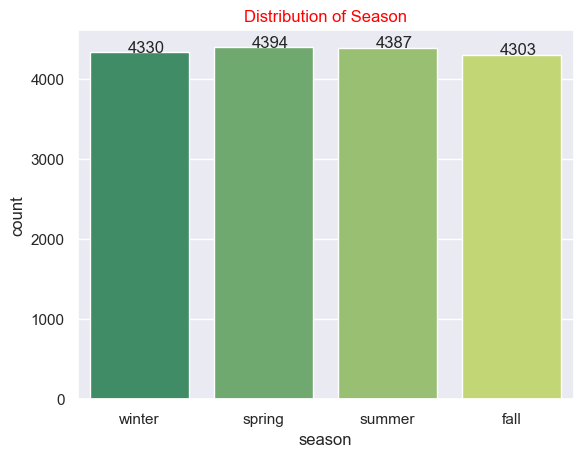

In [261]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "season",palette="summer")
ax.set_title("Distribution of Season", color= "red")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6));

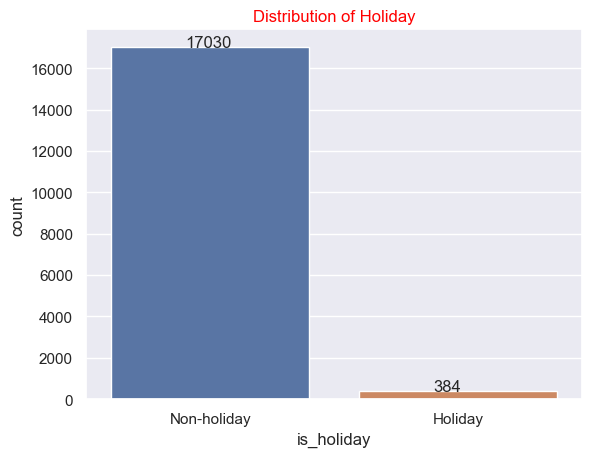

In [262]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "is_holiday")
ax.set_title("Distribution of Holiday", color= "red")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6));

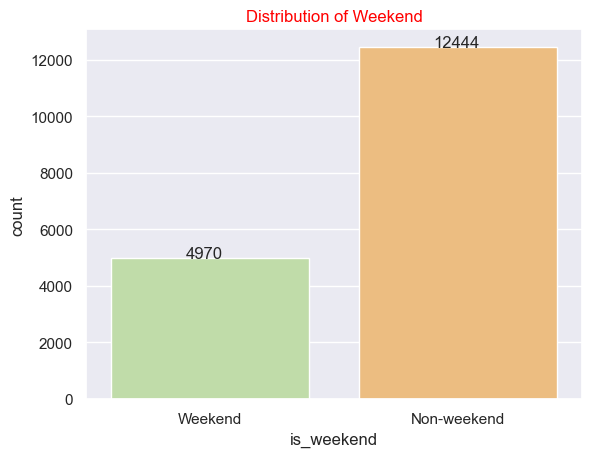

In [263]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "is_weekend",palette="Spectral_r")
ax.set_title("Distribution of Weekend", color= "red")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6));

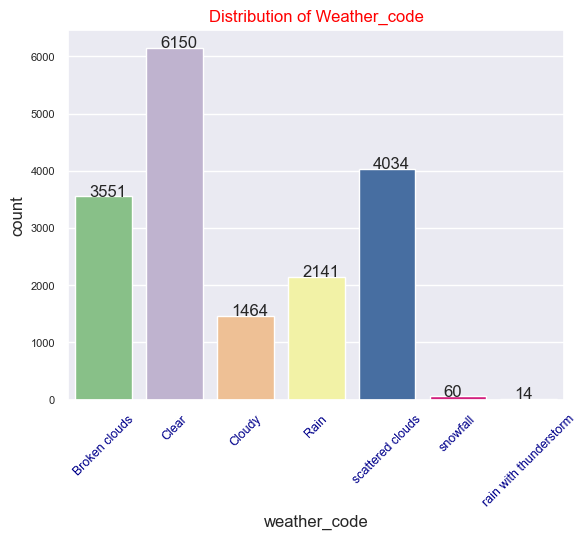

In [264]:
#usage of 

fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "weather_code", palette="Accent")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.6))

plt.xticks(rotation=45, color='darkblue')
plt.tick_params(axis='x', labelsize=9)

plt.tick_params(axis='y', labelsize=8)
ax.set_title("Distribution of Weather_code", color= "red")

plt.tight_layout;

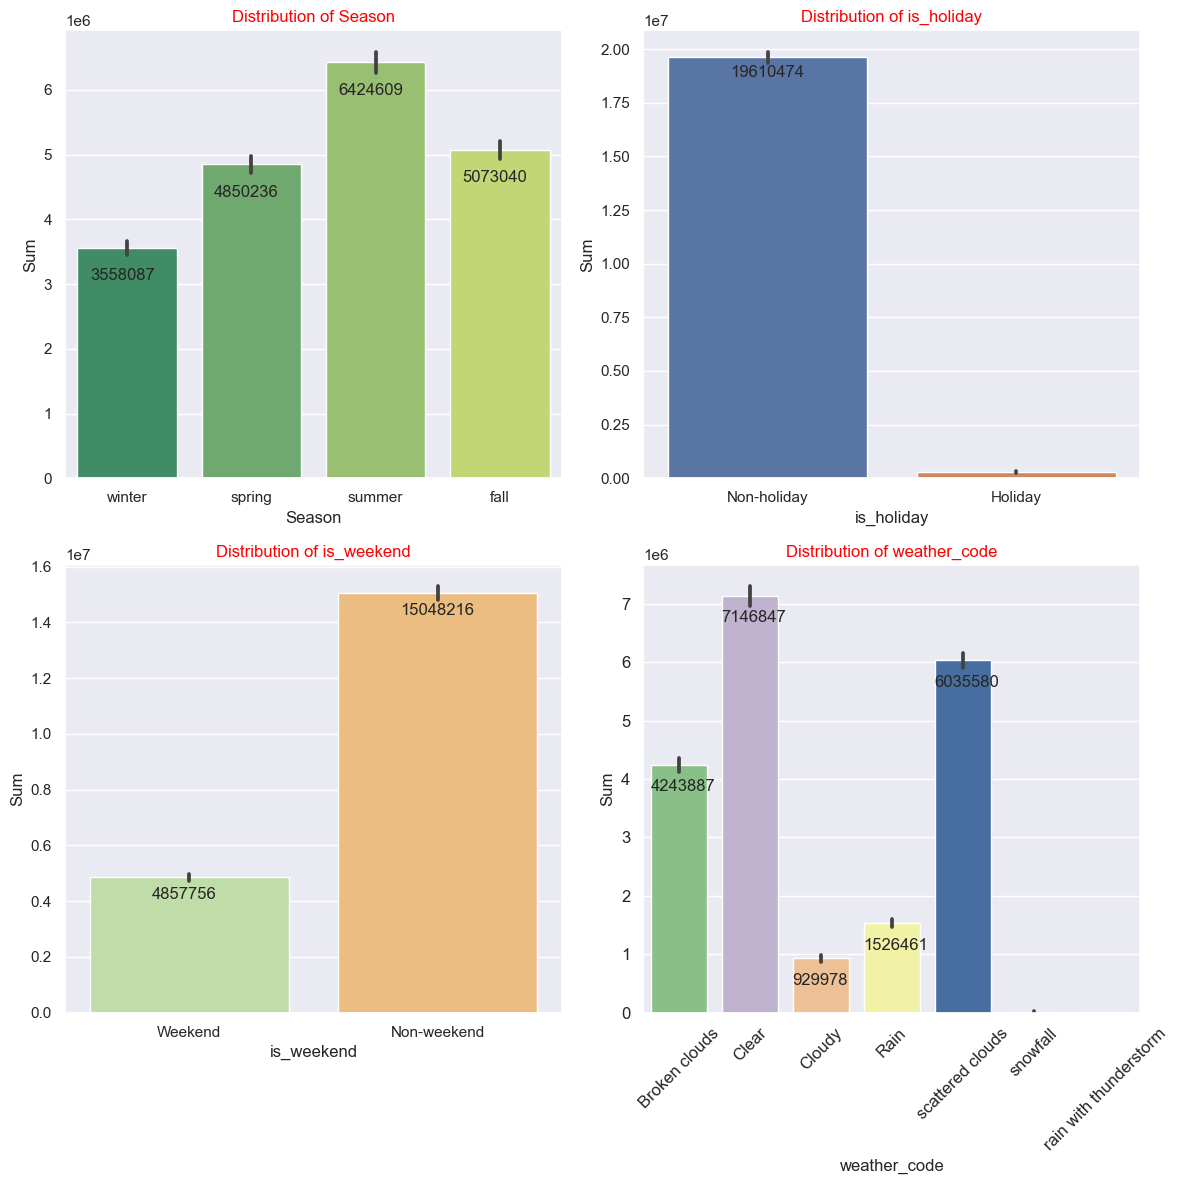

In [265]:
#sum of usage by day, season, wheather, holiday

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# First plot by season
sns.barplot(data=df, x="season", y='cnt', estimator=sum, ax=ax[0][0],palette="summer")
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Sum')
ax[0][0].set_title('Distribution of Season', color= "red")

for p in ax[0][0].patches:
    ax[0][0].annotate((p.get_height()), (p.get_x()+0.1, p.get_height()-500000)) 
    
# Second plot by holiday
sns.barplot(data=df, x="is_holiday", y='cnt', estimator=sum, ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Sum')
ax[0][1].set_title('Distribution of is_holiday', color= "red")

for p in ax[0][1].patches:
    ax[0][1].annotate((p.get_height()), (p.get_x()+0.25, p.get_height()-900000))
    
# Third plot by weekend
sns.barplot(data=df, x="is_weekend", y='cnt', estimator=sum, ax=ax[1][0],palette="Spectral_r")
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Sum')
ax[1][0].set_title('Distribution of is_weekend', color= "red")

for p in ax[1][0].patches:
    ax[1][0].annotate((p.get_height()), (p.get_x()+0.25, p.get_height()-800000))
    
# Fourth plot by weather code
sns.barplot(data=df, x="weather_code", y='cnt', estimator=sum, ax=ax[1][1], palette="Accent")
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Sum')
ax[1][1].set_title('Distribution of weather_code', color= "red")
ax[1][1].tick_params(axis='x', labelsize=12,rotation=45)
ax[1][1].tick_params(axis='y', labelsize=12)

for p in ax[1][1].patches:
    ax[1][1].annotate((p.get_height()),(p.get_x(), p.get_height()-450000))

fig.tight_layout()
plt.show()

In [266]:
#the usage of bicycle is maximized in clear and scattered clouds and minimized in snowfall and rain with thunderstorm weather

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [267]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday       object
is_weekend       object
season           object
dtype: object

In [268]:
df["timestamp"]

0        2015-01-04 00:00:00
1        2015-01-04 01:00:00
2        2015-01-04 02:00:00
3        2015-01-04 03:00:00
4        2015-01-04 04:00:00
                ...         
17409    2017-01-03 19:00:00
17410    2017-01-03 20:00:00
17411    2017-01-03 21:00:00
17412    2017-01-03 22:00:00
17413    2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: object

In [269]:
type(df["timestamp"][0])

str

In [270]:
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [271]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code            object
is_holiday              object
is_weekend              object
season                  object
dtype: object

In [272]:
df["timestamp"].dtype

dtype('<M8[ns]')

In [273]:
df.set_index("timestamp", inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,winter
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken clouds,Non-holiday,Non-weekend,winter
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,Non-holiday,Non-weekend,winter
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,Non-holiday,Non-weekend,winter


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

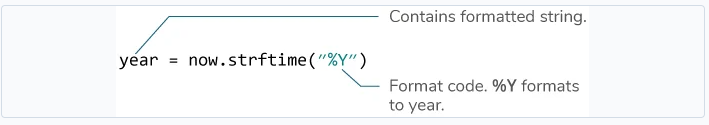

In [274]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [275]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [276]:
df.index.max()-df.index.min()

Timedelta('730 days 23:00:00')

In [277]:
df.index.year.max()- df.index.year.min()

2

In [278]:
f = lambda x:x.strftime("%Y-%m")

In [279]:
df["year_month"]=f(df.index)
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  object 
 6   is_holiday    17414 non-null  object 
 7   is_weekend    17414 non-null  object 
 8   season        17414 non-null  object 
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  hour          17414 non-null  int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 2.1+ MB


In [281]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,4


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [282]:
df.corr()

,cnt,t1,t2,hum,wind_speed,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,-0.094739,-0.086383,0.002040,0.001708,0.141792
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,1.000000,-0.026547,-0.021935,-0.002876,0.000542
month,0.063757,0.332712,0.368366,0.113149,-0.086383,-0.026547,1.000000,0.012614,-0.001080,-0.000312
day_of_month,-0.017887,0.005072,0.006791,-0.020868,0.002040,-0.021935,0.012614,1.000000,0.006974,-0.000310
day_of_week,-0.068688,-0.002317,-0.006824,0.011556,0.001708,-0.002876,-0.001080,0.006974,1.000000,0.001834
hour,0.324423,0.168708,0.153956,-0.295653,0.141792,0.000542,-0.000312,-0.000310,0.001834,1.000000


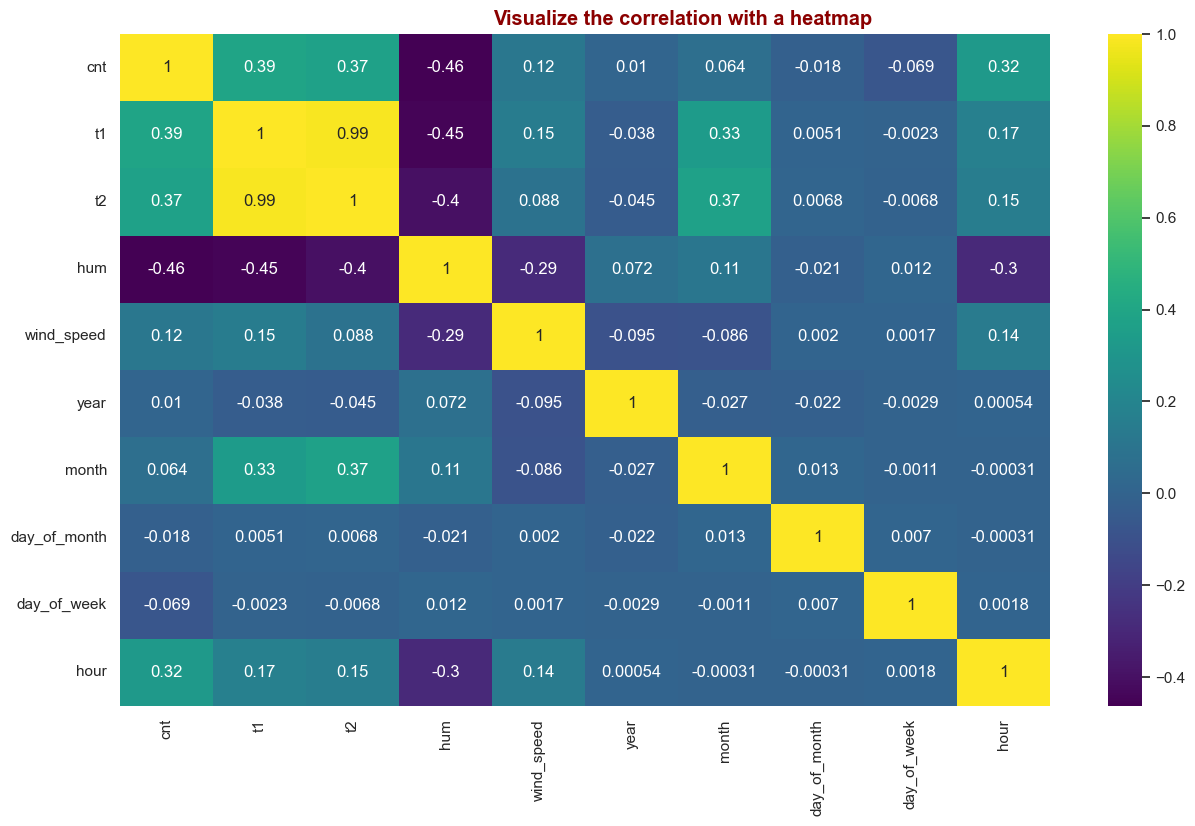

In [283]:
plt.figure(figsize=(15,8))
plt.suptitle('Visualize the correlation with a heatmap',color="darkred",fontweight= "bold")  
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.subplots_adjust(top=0.95);

In [284]:
df_corr=df.corr()[["cnt"]].sort_values(by="cnt", ascending=False)

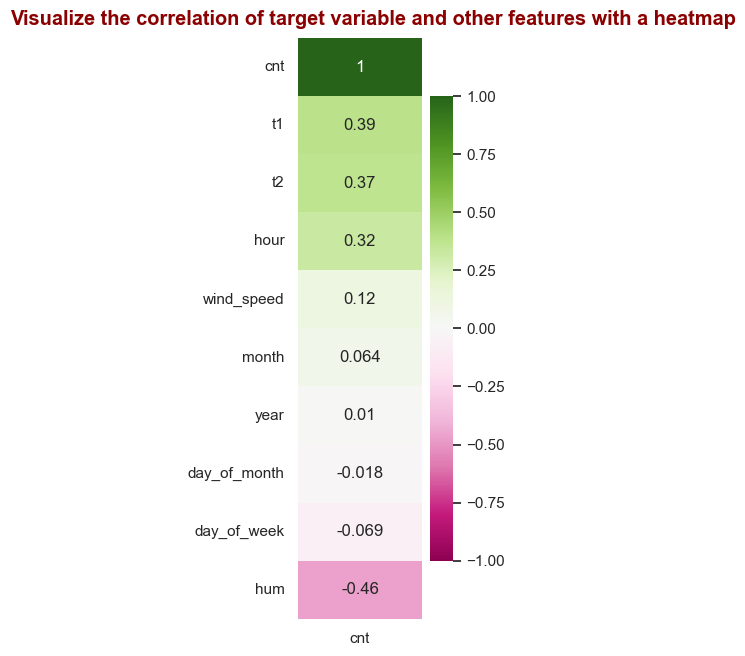

In [285]:
plt.figure(figsize=(2,7))
plt.suptitle('Visualize the correlation of target variable and other features with a heatmap',color="darkred",fontweight= "bold")  
sns.heatmap(df_corr, annot=True, cmap="PiYG",vmin=-1, vmax=1)
plt.subplots_adjust(top=0.94);

In [286]:
#t1, t2 and hour have the highest correlation with the count of a new bike shares.
#Since the correlation of t1 and t2 is very close, t2 can be discarded and continue with t1
#It is clear from the negative correlation in humidity that the count of a new bike shares decreases when humidity increases.

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

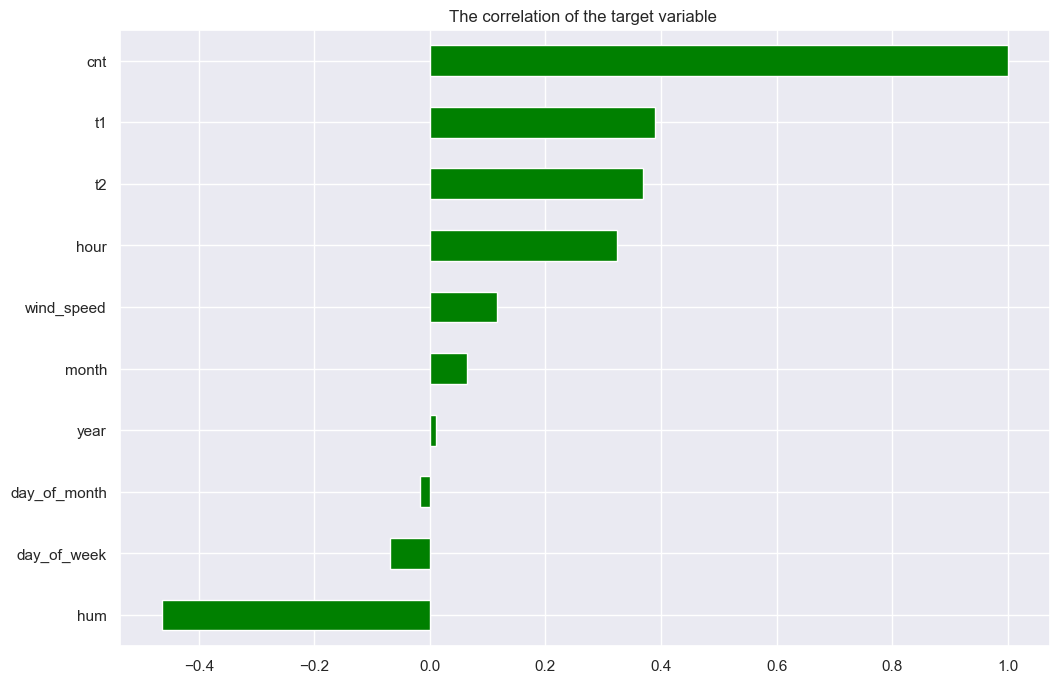

In [287]:
plt.figure(figsize=(12,8))
plt.title("The correlation of the target variable ")
df.corr()["cnt"].sort_values().plot.barh(color = "green");

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

In [288]:
df.reset_index(inplace=True)

In [289]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,4


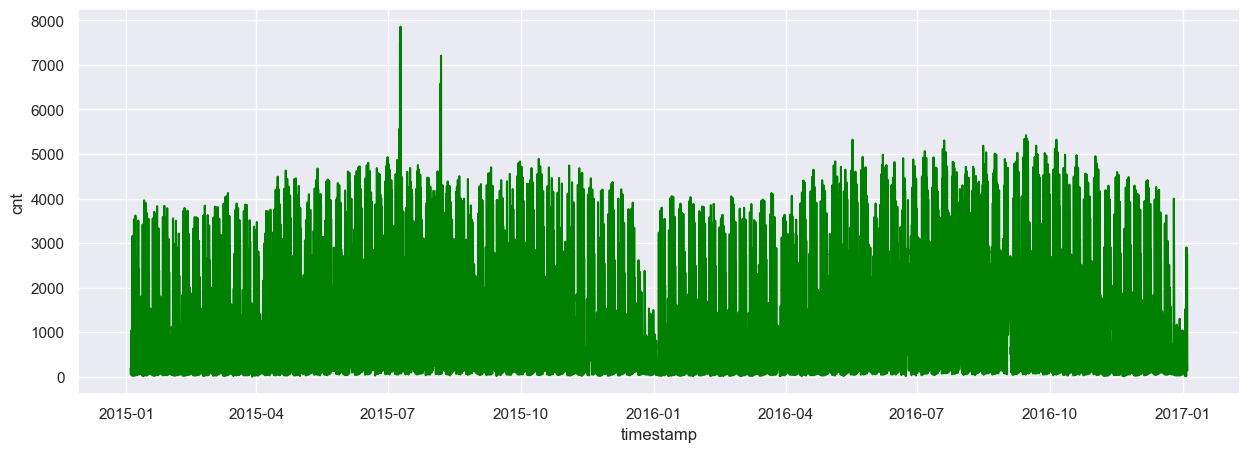

In [290]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.timestamp, y="cnt", data=df, color= "green");

In [291]:
# Convert dates from dataset to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

# Aggregate data by day
daily_counts = df.groupby(df['timestamp'].dt.date)['cnt'].sum()
daily_counts

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Name: cnt, Length: 730, dtype: int64

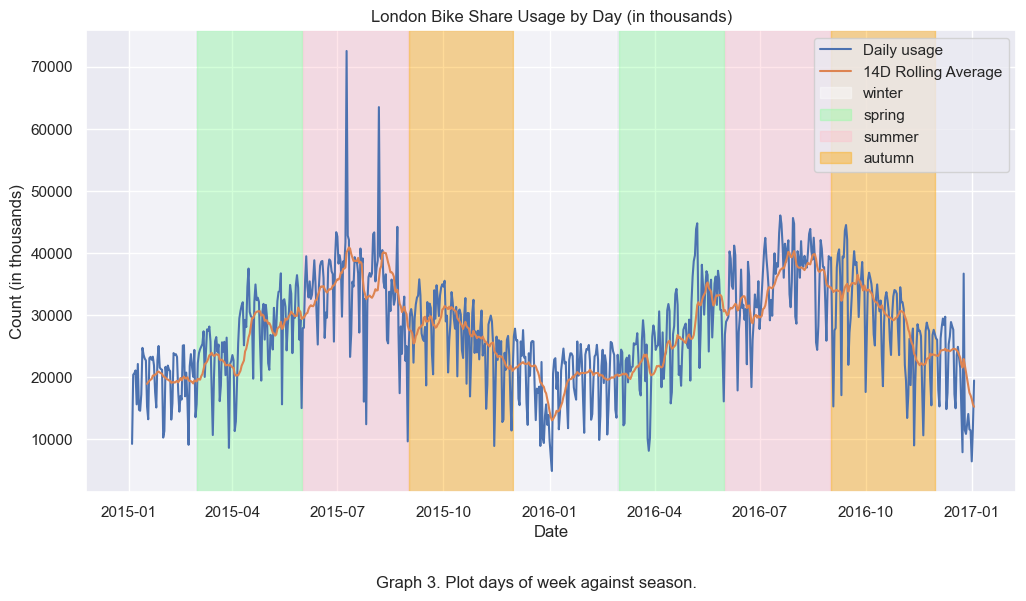

In [292]:
# Adjust chart size
plt.figure(figsize=(12, 6))

# Draw a graph
plt.plot(daily_counts, label='Daily usage')
plt.plot(daily_counts.rolling(window=14).mean(), label='14D Rolling Average')


# Set chart title and axis labels
plt.title('London Bike Share Usage by Day (in thousands)')
plt.xlabel('Date')
plt.ylabel('Count (in thousands)')

# Color the background to show the seasons
plt.axvspan('2015-01-01', '2015-02-28', color='white', alpha=0.4, label= "winter")
plt.axvspan('2015-03-01', '2015-05-31', color='xkcd:mint green', alpha=0.4, label= "spring")
plt.axvspan('2015-06-01', '2015-08-31', color='pink', alpha=0.4, label= "summer")
plt.axvspan('2015-09-01', '2015-11-30', color='orange', alpha=0.4, label= "autumn")
plt.axvspan('2015-12-01', '2016-02-28', color='white', alpha=0.4)
plt.axvspan('2016-03-01', '2016-05-31', color='xkcd:mint green', alpha=0.4)
plt.axvspan('2016-06-01', '2016-08-31', color='pink', alpha=0.4)
plt.axvspan('2016-09-01', '2016-11-30', color='orange',alpha=0.4)

# Add chart description
plt.figtext(0.5, -0.05, 'Graph 3. Plot days of week against season.', ha='center', fontsize=12)
# Show graph
plt.legend()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [293]:
df_sum=pd.DataFrame(df.groupby("year_month").cnt.sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


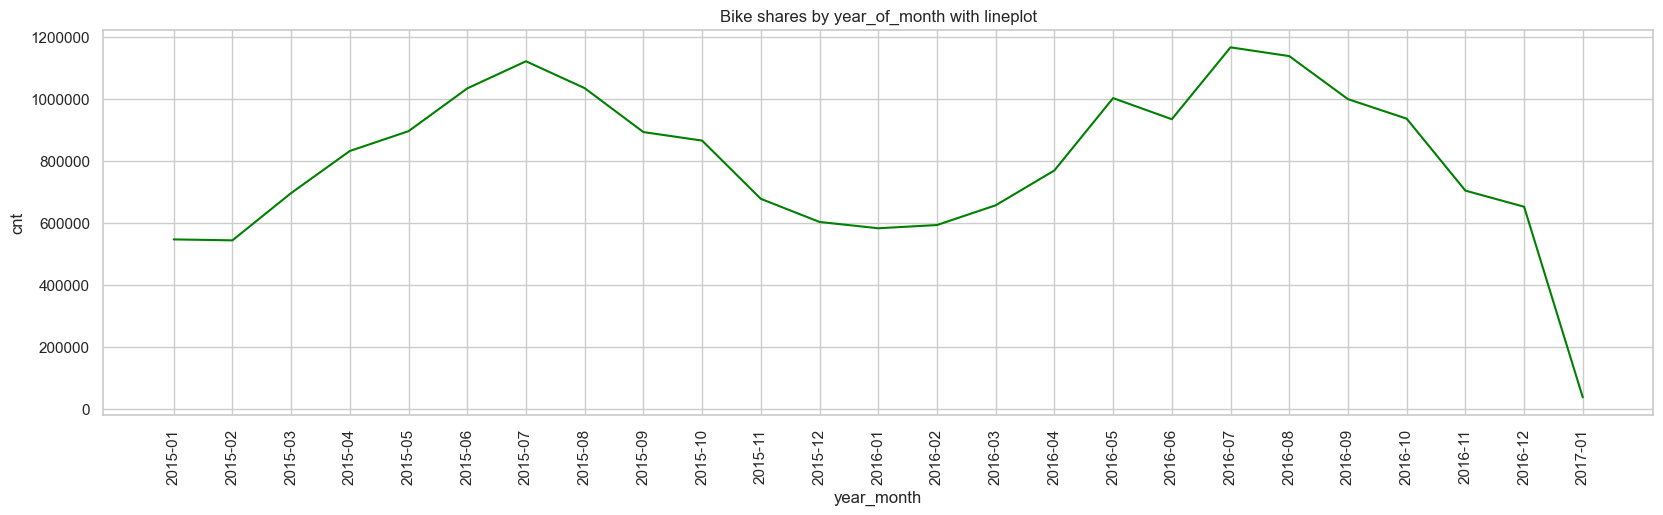

In [294]:
plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
sns.lineplot(x="year_month", y="cnt", data=df_sum, color= "green")
plt.title("Bike shares by year_of_month with lineplot")
plt.ticklabel_format(style="plain", axis="y") 
plt.xticks(rotation=90);  

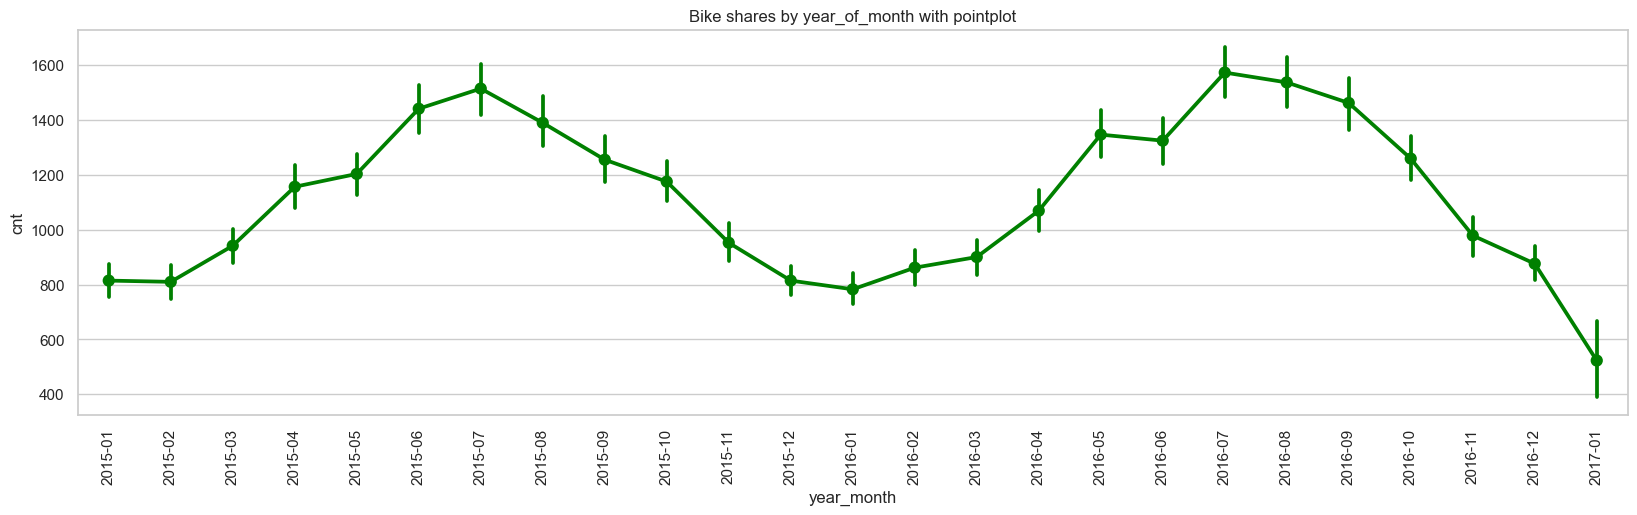

In [295]:
plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
sns.pointplot(x="year_month", y="cnt", data=df, color= "green")

plt.title("Bike shares by year_of_month with pointplot")
plt.ticklabel_format(style="plain", axis="y") 
plt.xticks(rotation=90);  

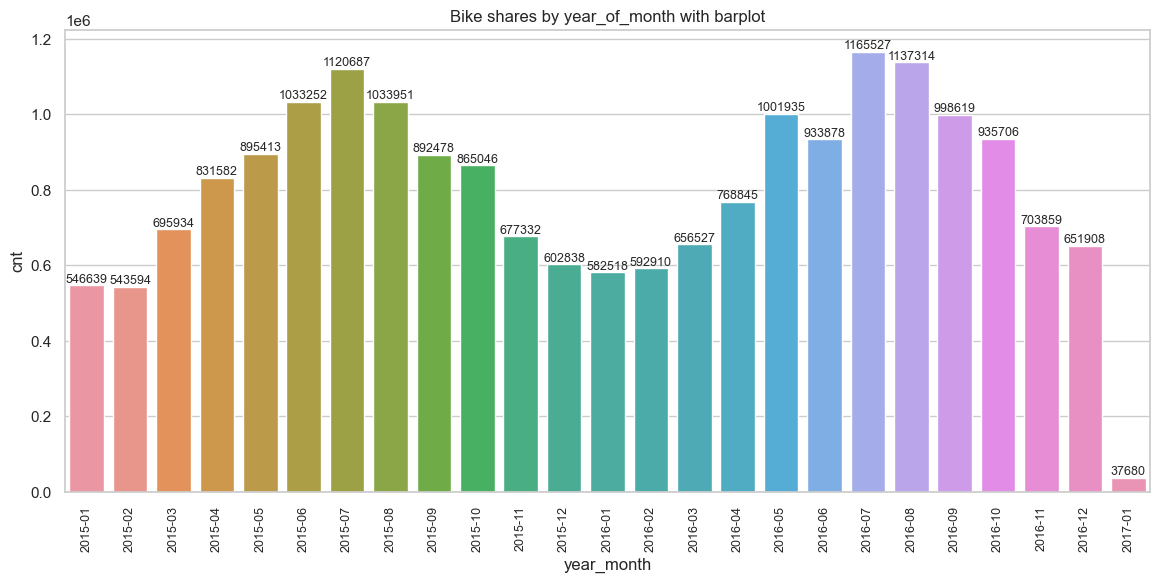

In [296]:
plt.figure(figsize=(14,6))

plt.title("Bike shares by year_of_month with barplot")
ax=sns.barplot(x="year_month", y="cnt", data=df, estimator=sum, ci=None)

plt.xticks(rotation=90, fontsize= 9)
ax.bar_label(ax.containers[0]  ,fmt='%.7g',fontsize=9);

In [297]:
#In both years, the use of bicycle reaches its maximum in June,July,August which are months of summer season
#and falls to a minimum in December,January,February which are months of winter season.

In [298]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,winter,2015-01,2015,1,4,6,4


In [299]:
df_month = df.groupby("month").cnt.sum()
df_month

month
1     1166837
2     1136504
3     1352461
4     1600427
5     1897348
6     1967130
7     2286214
8     2171265
9     1891097
10    1800752
11    1381191
12    1254746
Name: cnt, dtype: int64

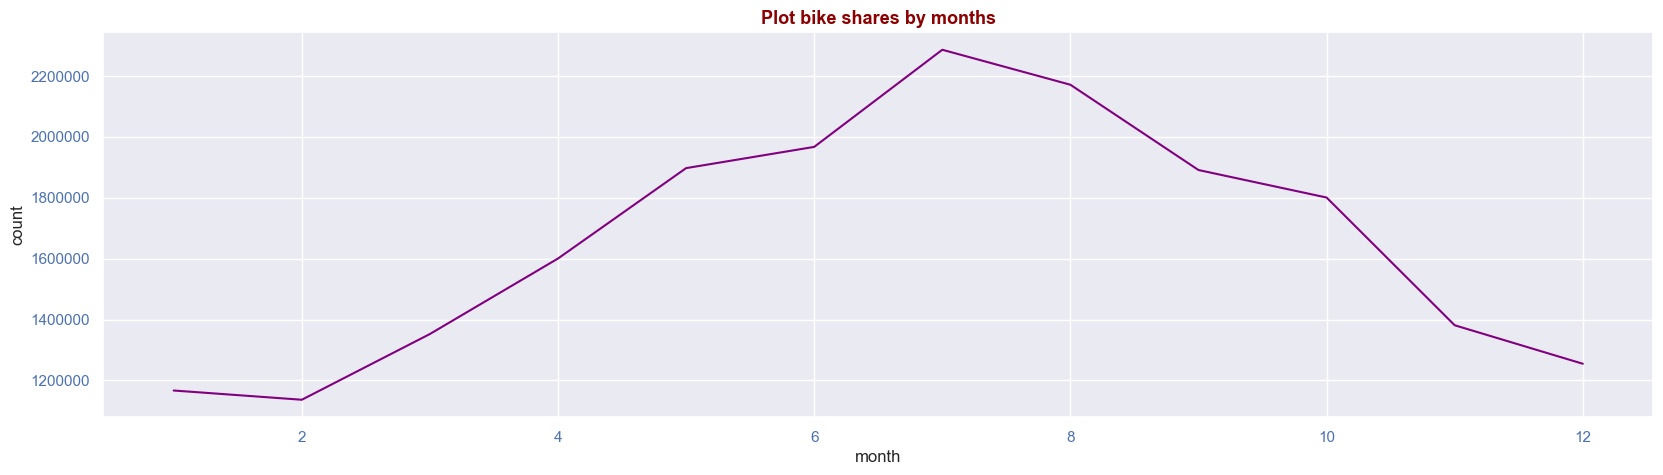

In [300]:
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')

sns.lineplot(x=df_month.index, y=df_month.values, data=df_month,color = "purple" )

plt.xlabel("month")
plt.xticks(color='b')

plt.ylabel("count")
plt.yticks(color='b')

plt.title("Plot bike shares by months", color= "darkred", fontsize= 13, fontweight="bold")

plt.ticklabel_format(style="plain", axis="y");

In [301]:
df_month.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [302]:
df_month.values

array([1166837, 1136504, 1352461, 1600427, 1897348, 1967130, 2286214,
       2171265, 1891097, 1800752, 1381191, 1254746], dtype=int64)

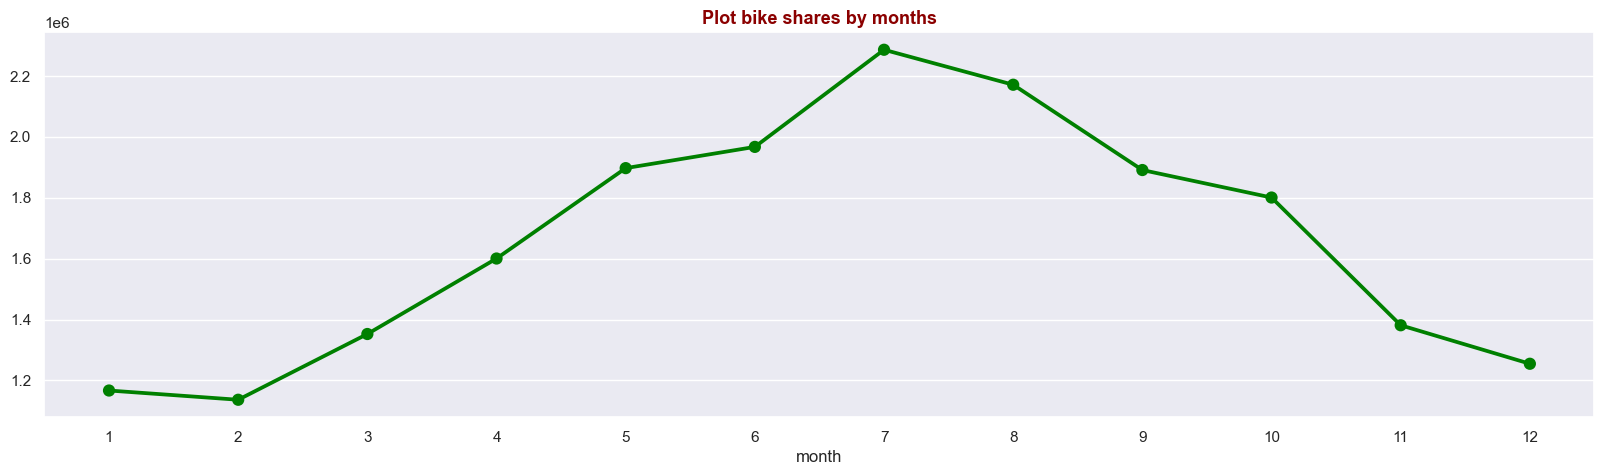

In [303]:
plt.figure(figsize=(20,5))
plt.title("Plot bike shares by months", color= "darkred", fontsize= 13, fontweight="bold")
sns.pointplot(x=df_month.index, y=df_month.values, data=df, color= "green",markers='o', markersize= 13);

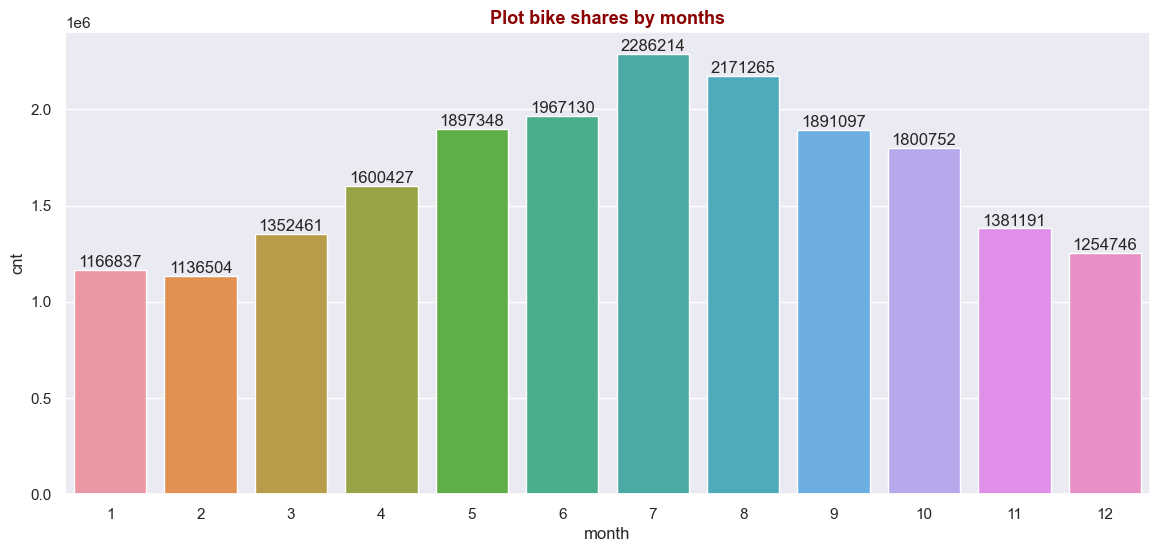

In [304]:
plt.figure(figsize=(14,6))

ax=sns.barplot(x="month", y="cnt", data=df, estimator=sum, ci=None)
plt.title("Plot bike shares by months", color= "darkred", fontsize= 13, fontweight="bold")

ax.bar_label(ax.containers[0]  ,fmt='%.7g');

In [305]:
#the total usage of bicycle reaches its maximum in July

In [306]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

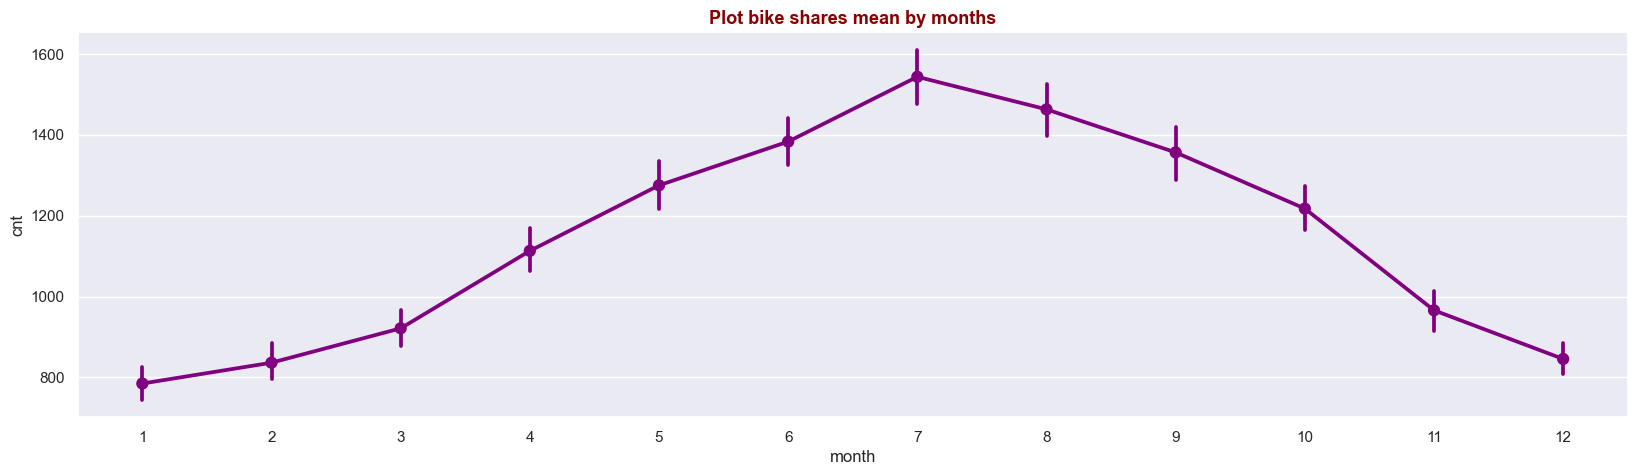

In [307]:
plt.figure(figsize=(20,5))
plt.title("Plot bike shares mean by months", color= "darkred", fontsize= 13, fontweight="bold")

sns.pointplot(x="month", y="cnt", data=df, color= "purple");

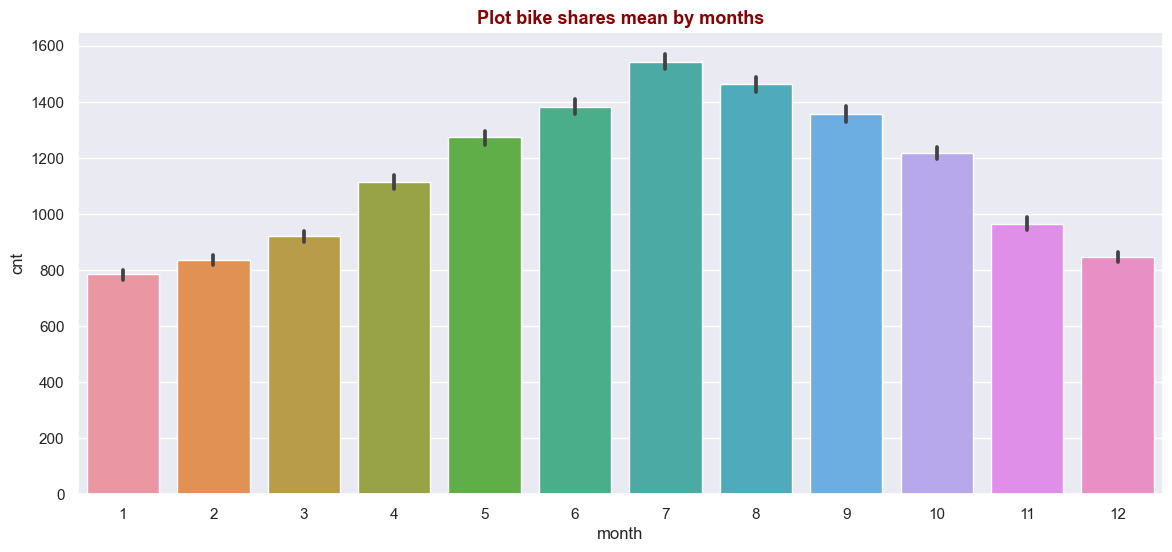

In [308]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares mean by months", color= "darkred", fontsize= 13, fontweight="bold")

sns.barplot(x="month", y="cnt", data=df, ci=60);

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

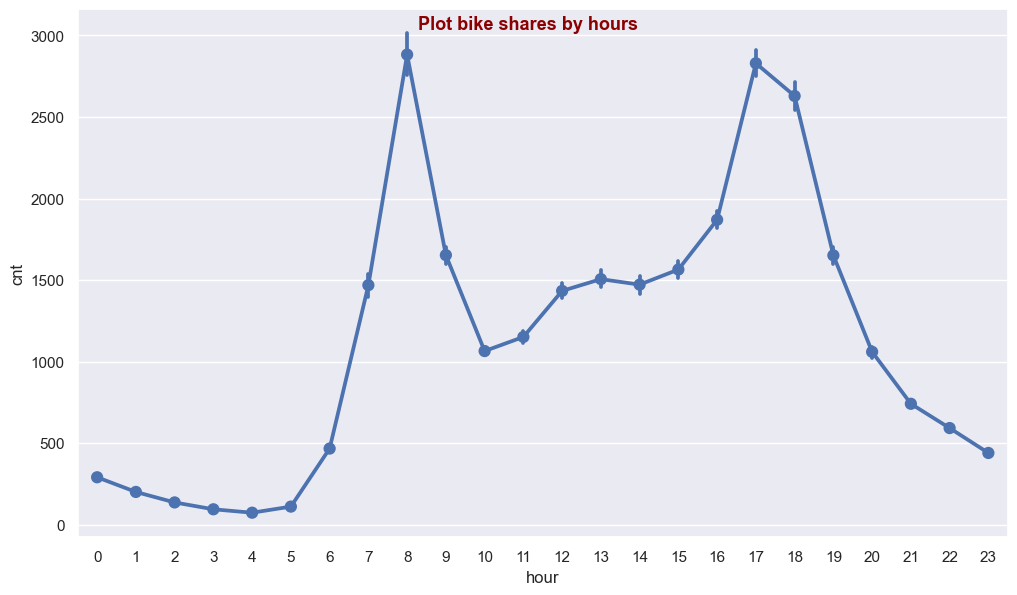

In [309]:
fig, ax = plt.subplots( figsize=(12,6))
plt.suptitle("Plot bike shares by hours", color= "darkred", fontsize= 13, fontweight="bold")

sns.pointplot(data=df, x="hour", y="cnt")
plt.subplots_adjust(top=0.99) ;

In [310]:
# It is seen that Bicycle use is concentrated during commuting and rush hours which are 8 in the morning and 17 in the evening.

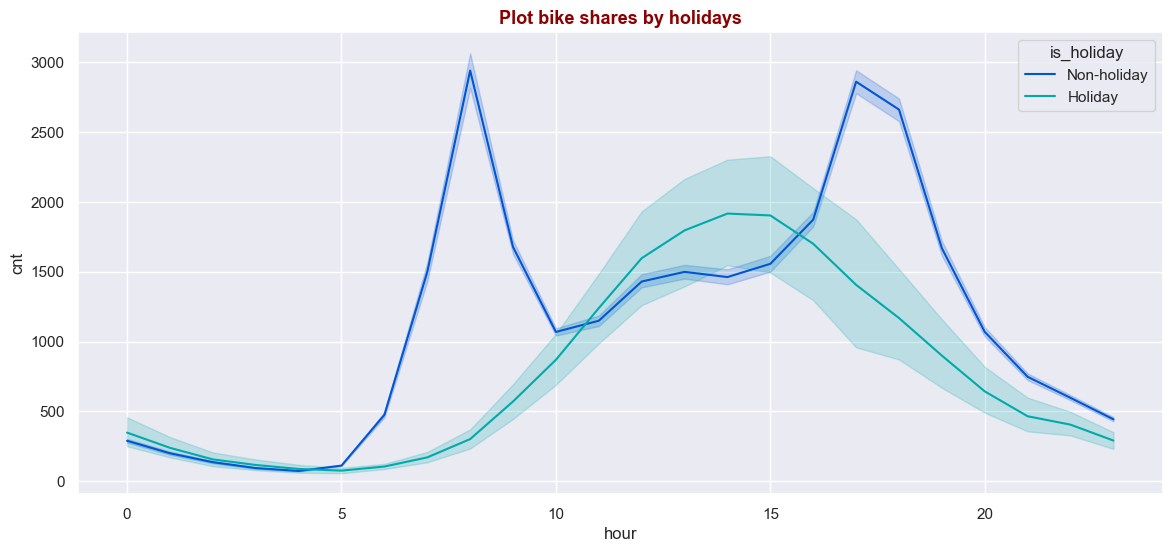

In [311]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares by holidays", color= "darkred", fontsize= 13, fontweight="bold")

sns.lineplot(x="hour", y="cnt", data=df, hue="is_holiday" , palette="winter");

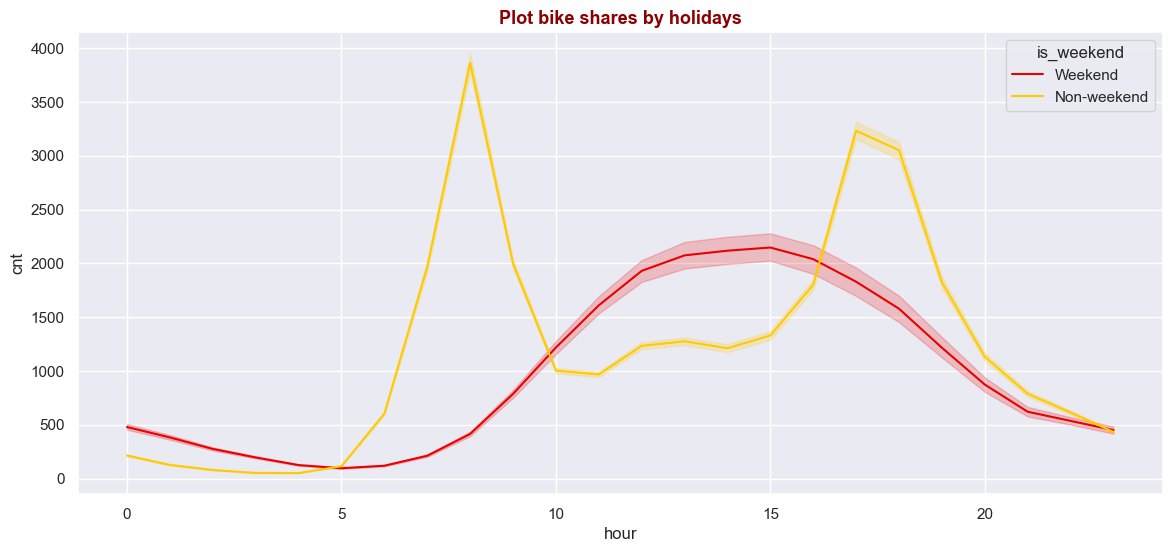

In [312]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares by holidays", color= "darkred", fontsize= 13, fontweight="bold")

sns.lineplot(x="hour", y="cnt", data=df, hue="is_weekend",palette= "hot");

In [313]:
#Holiday and weekend data are similar.
#Weekdays and non-holidays are also similar to each other and to the overall hour view

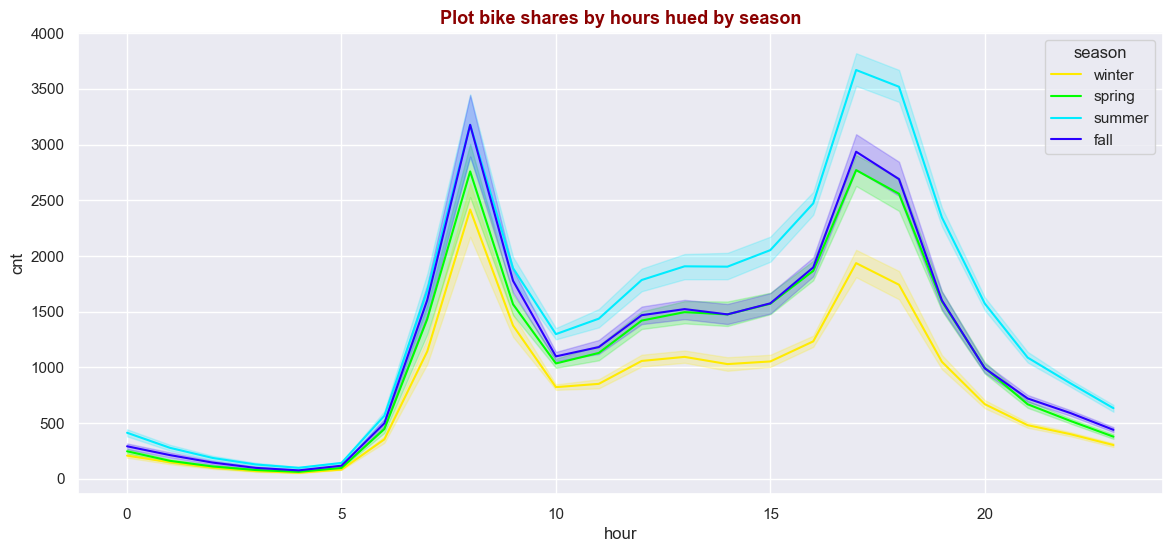

In [314]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares by hours hued by season", color= "darkred", fontsize= 13, fontweight="bold")

sns.lineplot(x="hour", y="cnt", data=df, hue="season", palette="gist_rainbow");

In [315]:
#It is observed that bicycle use is more intense in the evening hours in summer compared to other seasons. On the other hand,
#It is observed that bicycle use is less intense in the evening hours in winter compared to other seasons.
# Furthermore, spring and fall nearly as same as general weekdays data.
#Lastly, seasonal datas are similar to Non_weekend data.

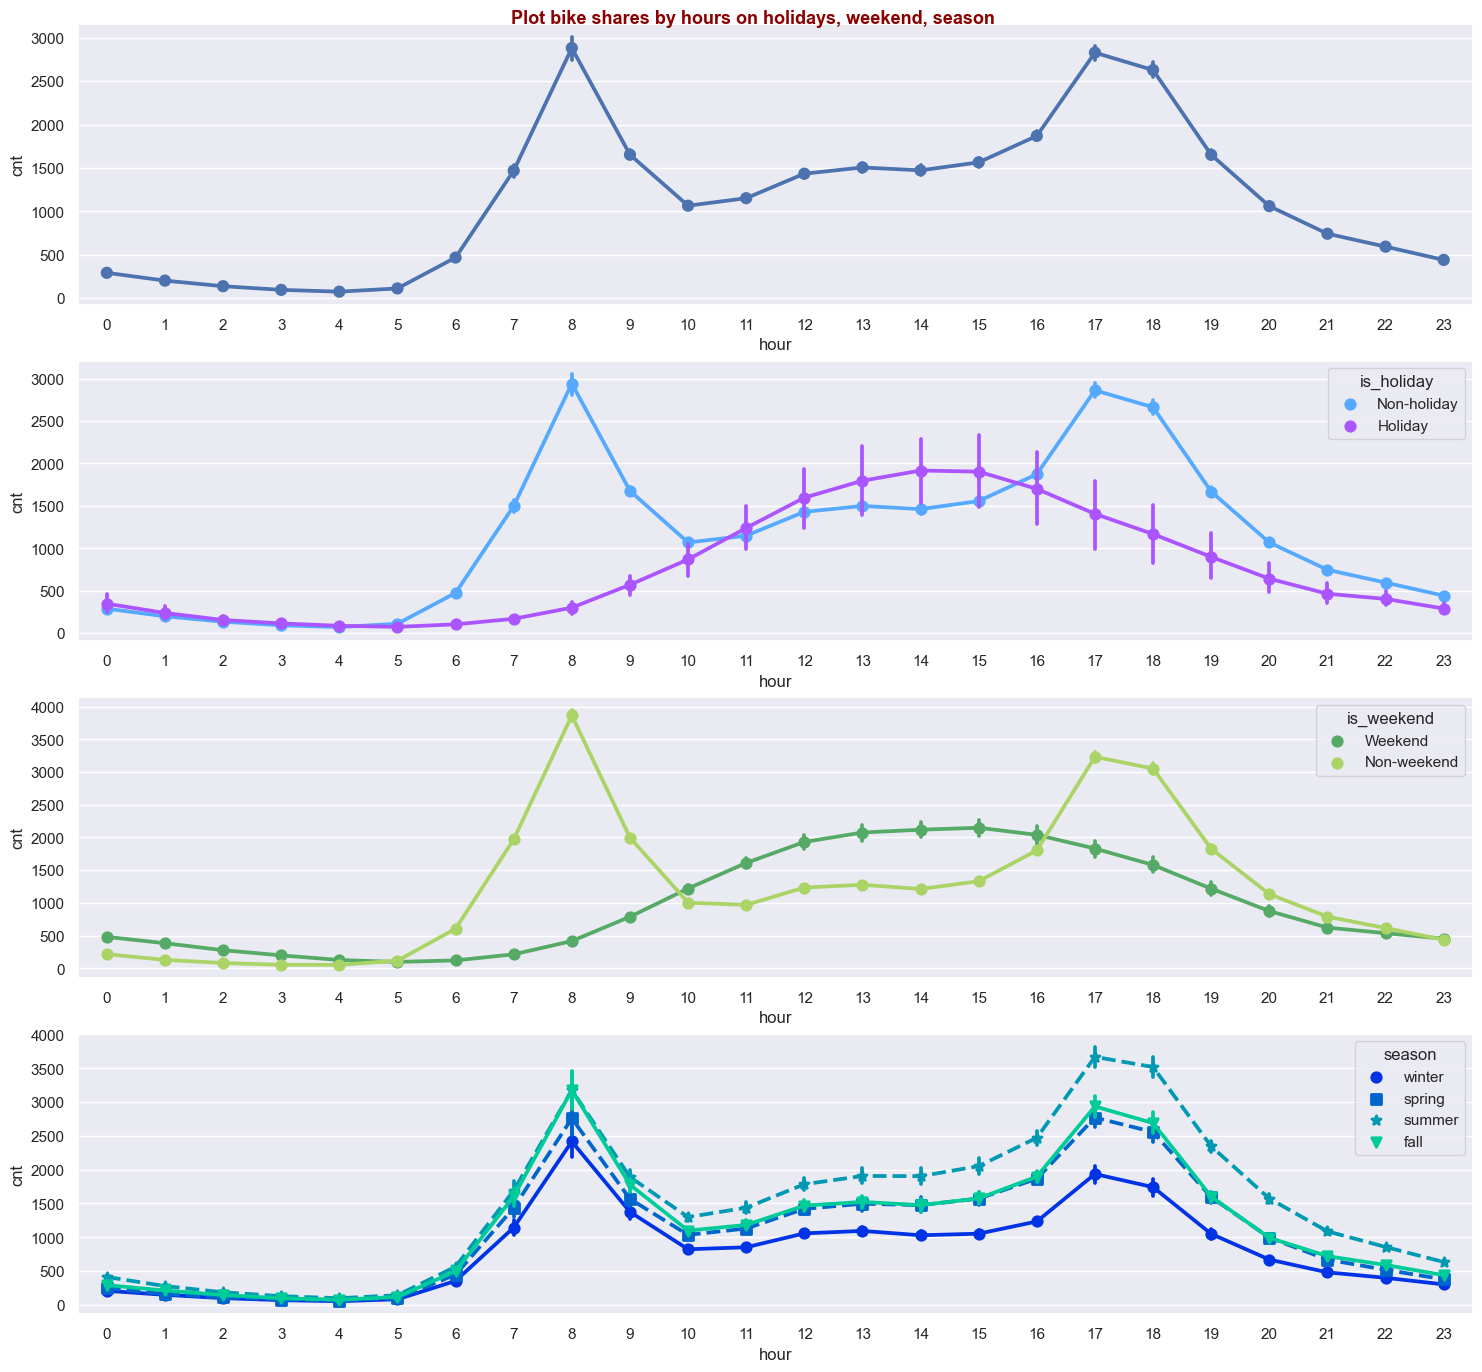

In [316]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(18,15))

sns.pointplot(data=df, x="hour", y="cnt", ax=ax1)

sns.pointplot(data=df, x="hour", y="cnt", ax=ax2, hue="is_holiday",palette="cool")
sns.pointplot(data=df, x="hour", y="cnt", ax=ax3, hue="is_weekend",palette= "summer")
sns.pointplot(data=df, x="hour", y="cnt", ax=ax4, hue="season", palette="winter",
    markers=["o", "s", "*", "v"], linestyles=["-", "--","--","-"])
plt.suptitle("Plot bike shares by hours on holidays, weekend, season", color= "darkred", fontsize= 13, fontweight="bold")
plt.subplots_adjust(top=0.97) ;

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

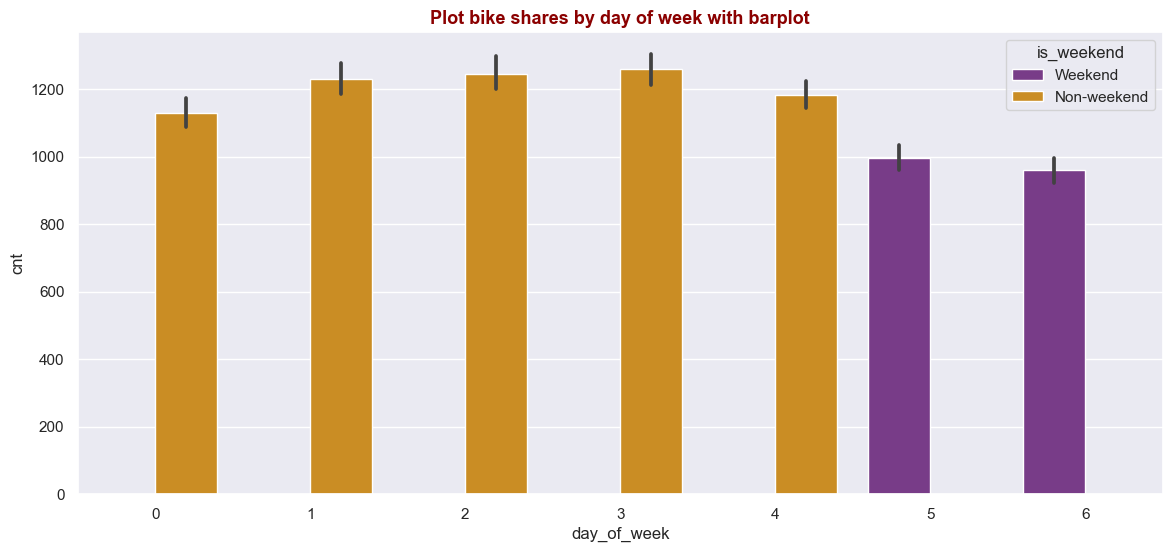

In [317]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares by day of week with barplot", color= "darkred", fontsize= 13, fontweight="bold")

sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend", palette="CMRmap");

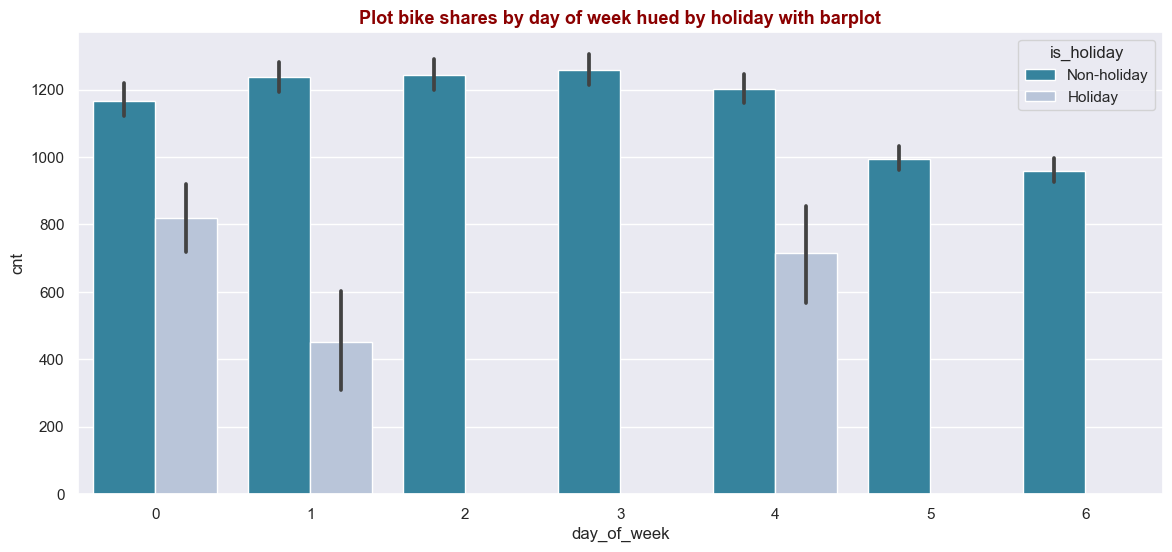

In [318]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares by day of week hued by holiday with barplot", color= "darkred", fontsize= 13, fontweight="bold")

sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_holiday",palette="PuBuGn_r");

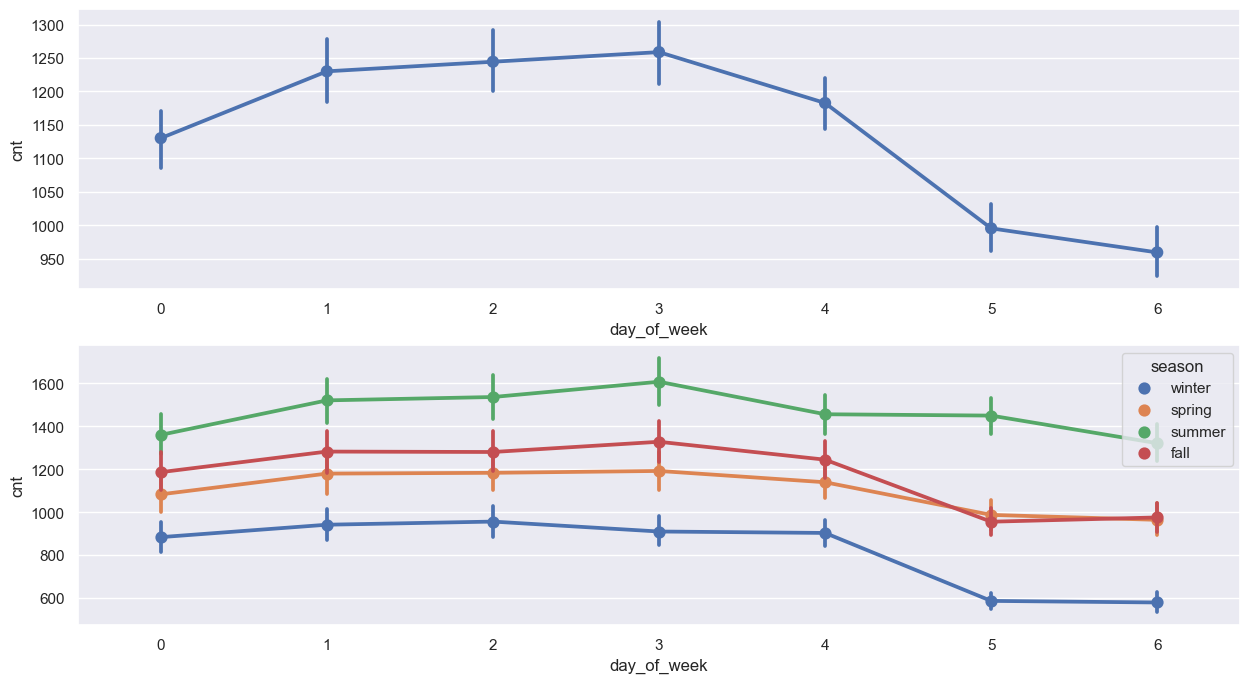

In [319]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,8))

sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax1)
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax2, hue="season");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

In [320]:
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


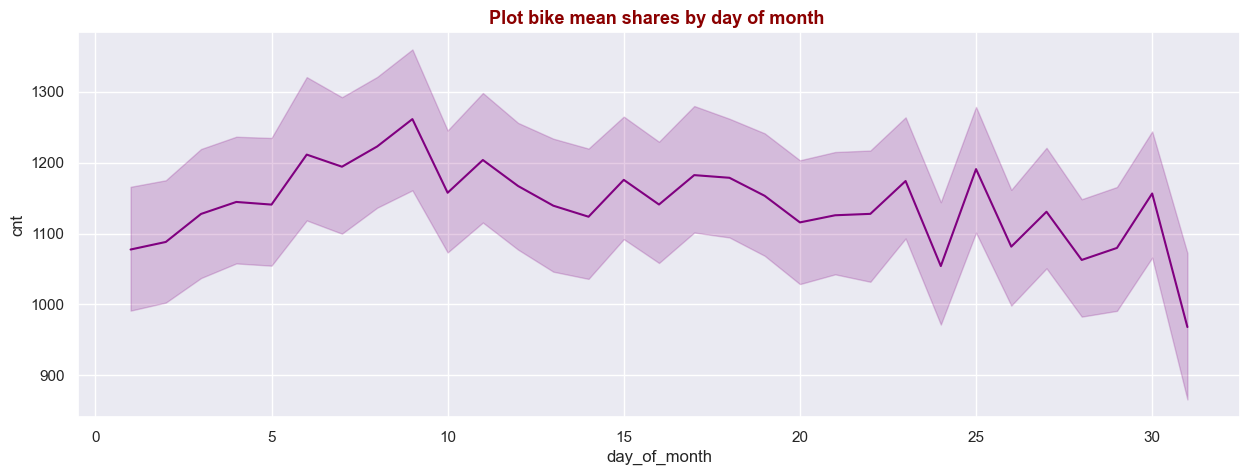

In [321]:
plt.figure(figsize=(15, 5))
plt.title("Plot bike mean shares by day of month ", color= "darkred", fontsize= 13, fontweight="bold")

sns.lineplot(x='day_of_month', y='cnt', data=df,color= "purple" );

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

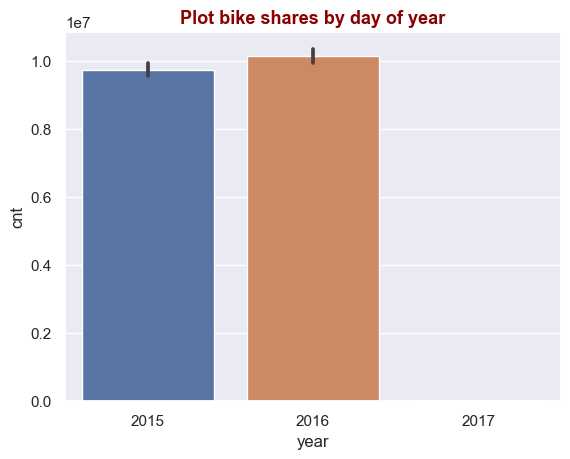

In [322]:
sns.barplot(x="year", y="cnt", data=df,estimator=sum)
plt.title("Plot bike shares by day of year", color= "darkred", fontsize= 13, fontweight="bold");

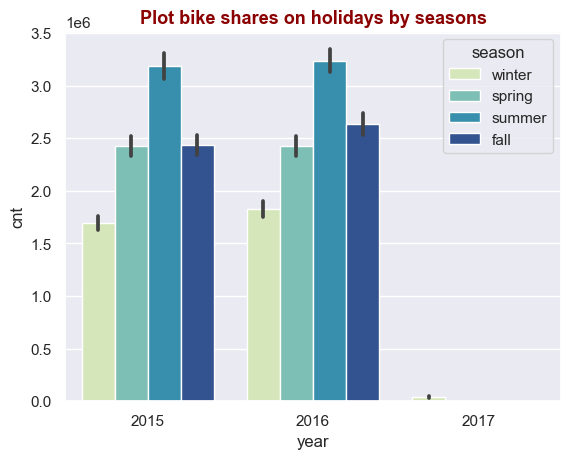

In [323]:
sns.barplot(data=df, x="year", y="cnt", hue="season", estimator=sum,palette="YlGnBu")
plt.title("Plot bike shares on holidays by seasons", color= "darkred", fontsize= 13, fontweight="bold");

In [324]:
#In both years, the use of bicycle reaches its maximum in summer season and falls to a minimum in winter season.

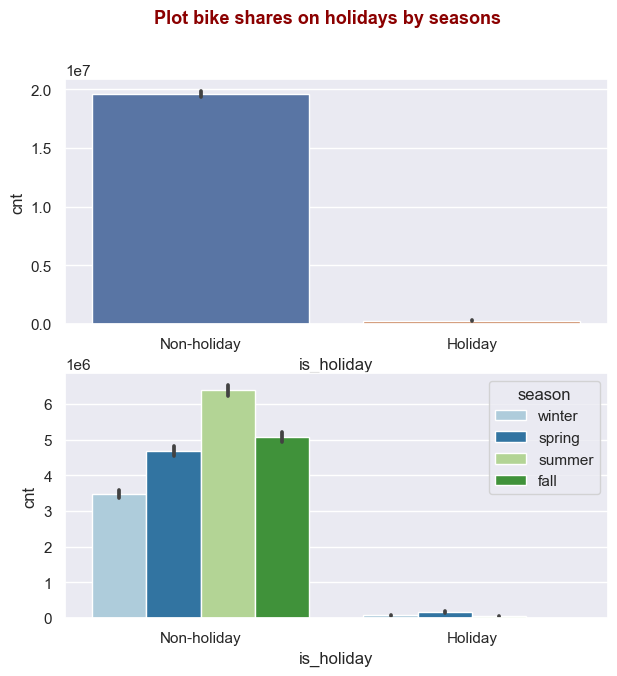

In [325]:
fig, ax = plt.subplots(2,1, figsize=(7,7))

sns.barplot(data=df, x = "is_holiday", y="cnt",estimator=sum, ax =ax[0])

sns.barplot(data=df, x="is_holiday", y="cnt", hue="season", estimator=sum, ax =ax[1],palette="Paired")
plt.suptitle("Plot bike shares on holidays by seasons", color= "darkred", fontsize= 13, fontweight="bold");

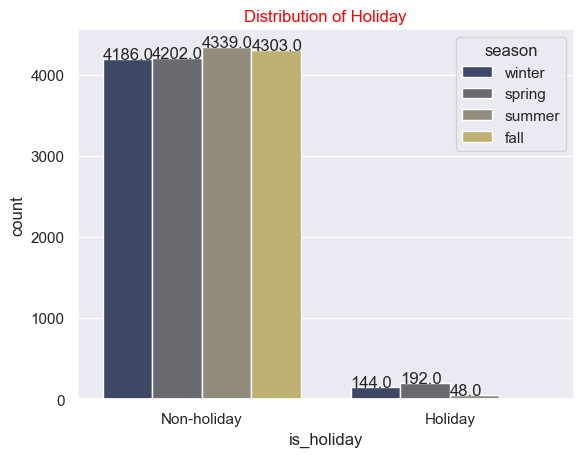

In [326]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "is_holiday",hue= "season",palette="cividis")
ax.set_title("Distribution of Holiday", color= "red")


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(), p.get_height()+0.6))
plt.tight_layout;

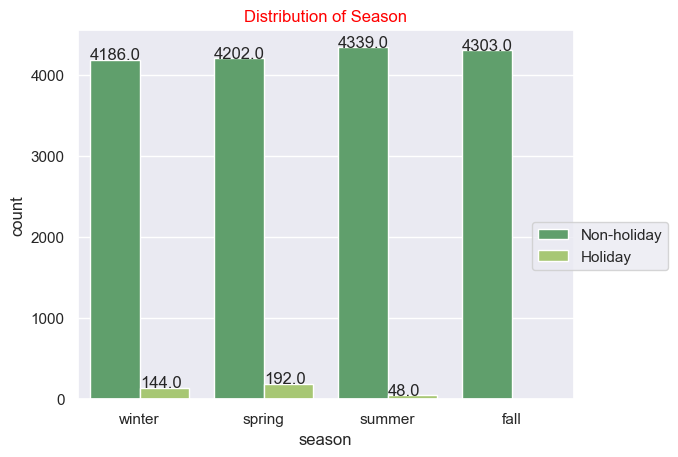

In [327]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "season",palette="summer", hue="is_holiday")
ax.set_title("Distribution of Season", color= "red")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(), p.get_height()+0.6))
plt.legend(bbox_to_anchor = (0.9, 0.5));

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [328]:
df["is_weekend"].value_counts()

Non-weekend    12444
Weekend         4970
Name: is_weekend, dtype: int64

In [329]:
df["is_weekend"].value_counts().values

array([12444,  4970], dtype=int64)

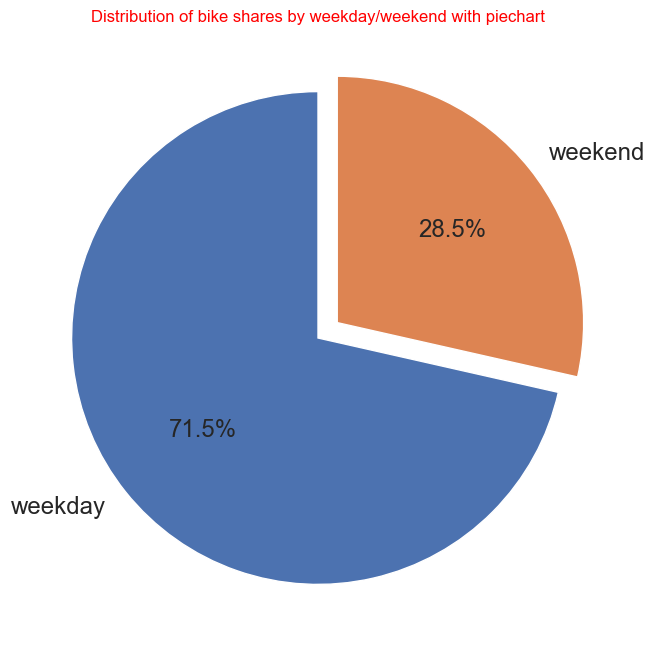

In [330]:
fig,ax=plt.subplots(figsize=(12,8))

explode=(0,0.1)
ax.set_title('Distribution of bike shares by weekday/weekend with piechart',color="red")
ax.pie(x=df["is_weekend"].value_counts().values, 
       labels=["weekday", "weekend"],
       explode=explode,
       autopct="%.1f%%",
       textprops=({'size': 'x-large'}),startangle=90);

In [331]:
df_pie = df.groupby(['is_weekend'])["cnt"].sum().reset_index()
df_pie

,is_weekend,cnt
0,Non-weekend,15048216
1,Weekend,4857756


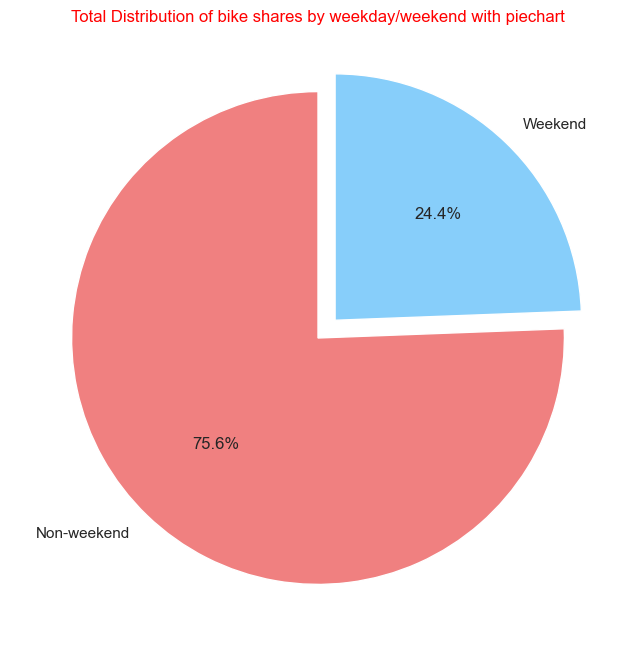

In [332]:
fig,ax=plt.subplots(figsize=(12,8))

explode=(0,0.1)
ax.pie(x=df_pie.cnt, labels=df_pie.is_weekend, autopct='%1.1f%%' ,explode=explode,startangle=90,colors=["lightcoral", "lightskyblue"])
ax.set_title('Total Distribution of bike shares by weekday/weekend with piechart',color="red");

In [333]:
df_pie.value_counts().index

MultiIndex([('Non-weekend', 15048216),
            (    'Weekend',  4857756)],
           names=['is_weekend', 'cnt'])

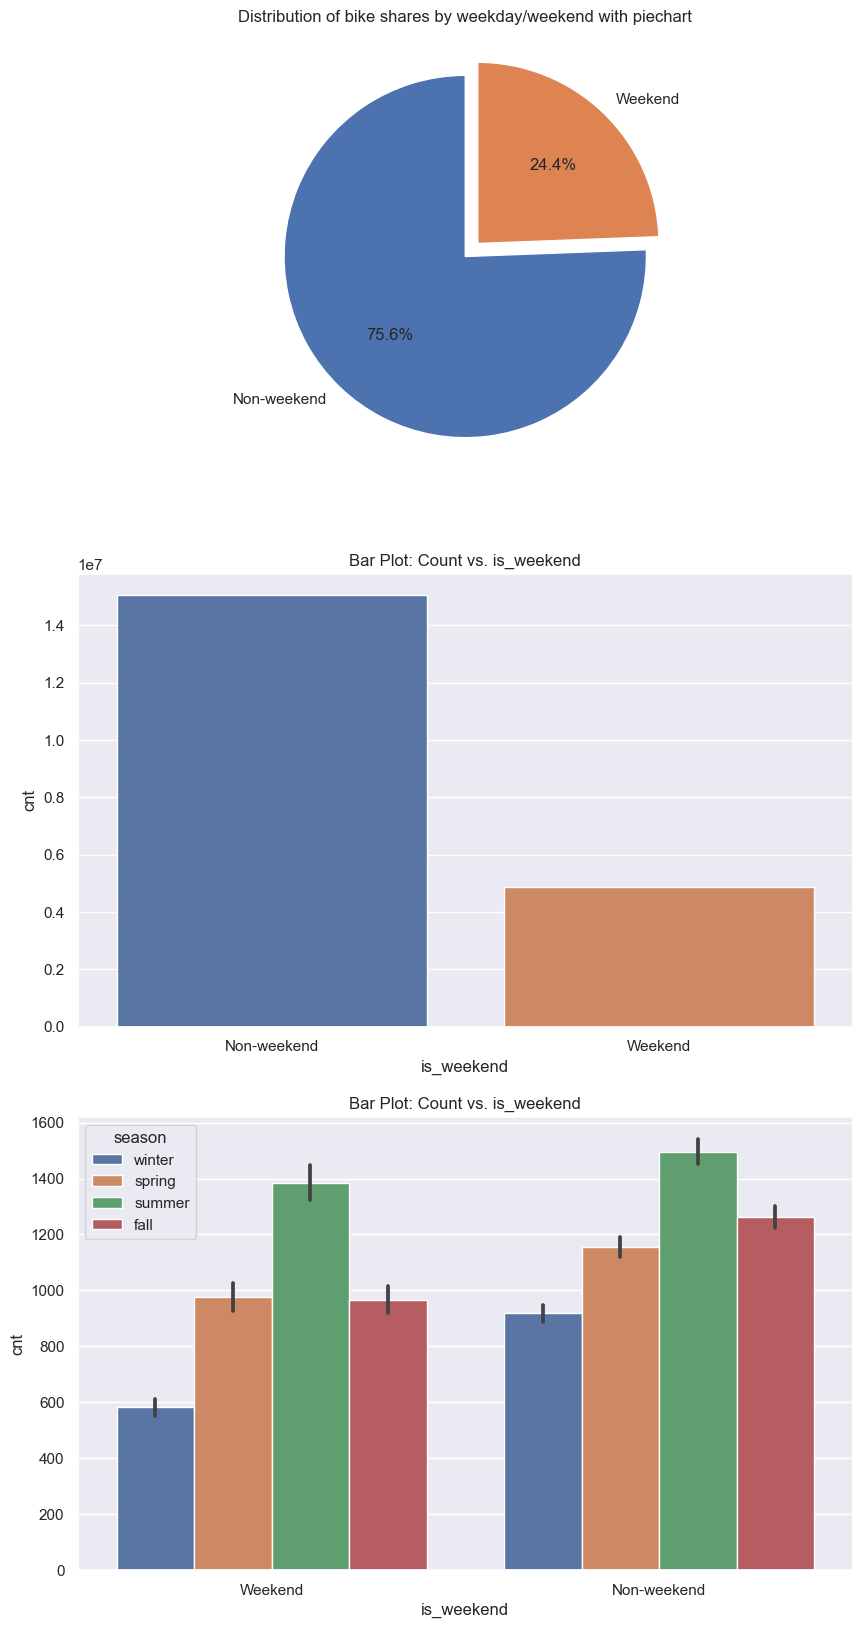

In [334]:
# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 20))
explode=(0,0.1)
# Pie chart
ax[0].pie(x=df_pie.cnt, labels=df_pie.is_weekend, autopct='%1.1f%%',explode=explode,startangle=90)
ax[0].set_title('Distribution of bike shares by weekday/weekend with piechart')

sns.barplot(data=df_pie, x="is_weekend", y="cnt", ax=ax[1])
ax[1].set_title('Bar Plot: Count vs. is_weekend')

# Bar plot
sns.barplot(data=df, x="is_weekend", y="cnt", hue="season", ax=ax[2])
ax[2].set_title('Bar Plot: Count vs. is_weekend')

# Display the plots
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

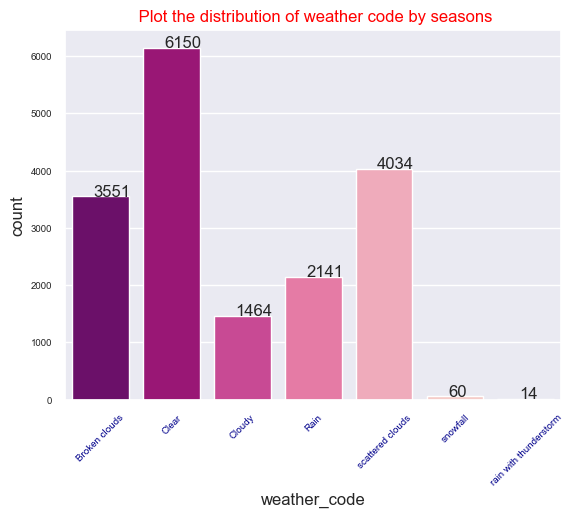

In [335]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "weather_code", palette='RdPu_r')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6))

plt.xticks(rotation=45, color='darkblue')
plt.tick_params(axis='x', labelsize=7)

plt.tick_params(axis='y', labelsize=7)
ax.set_title(' Plot the distribution of weather code by seasons',color="red");

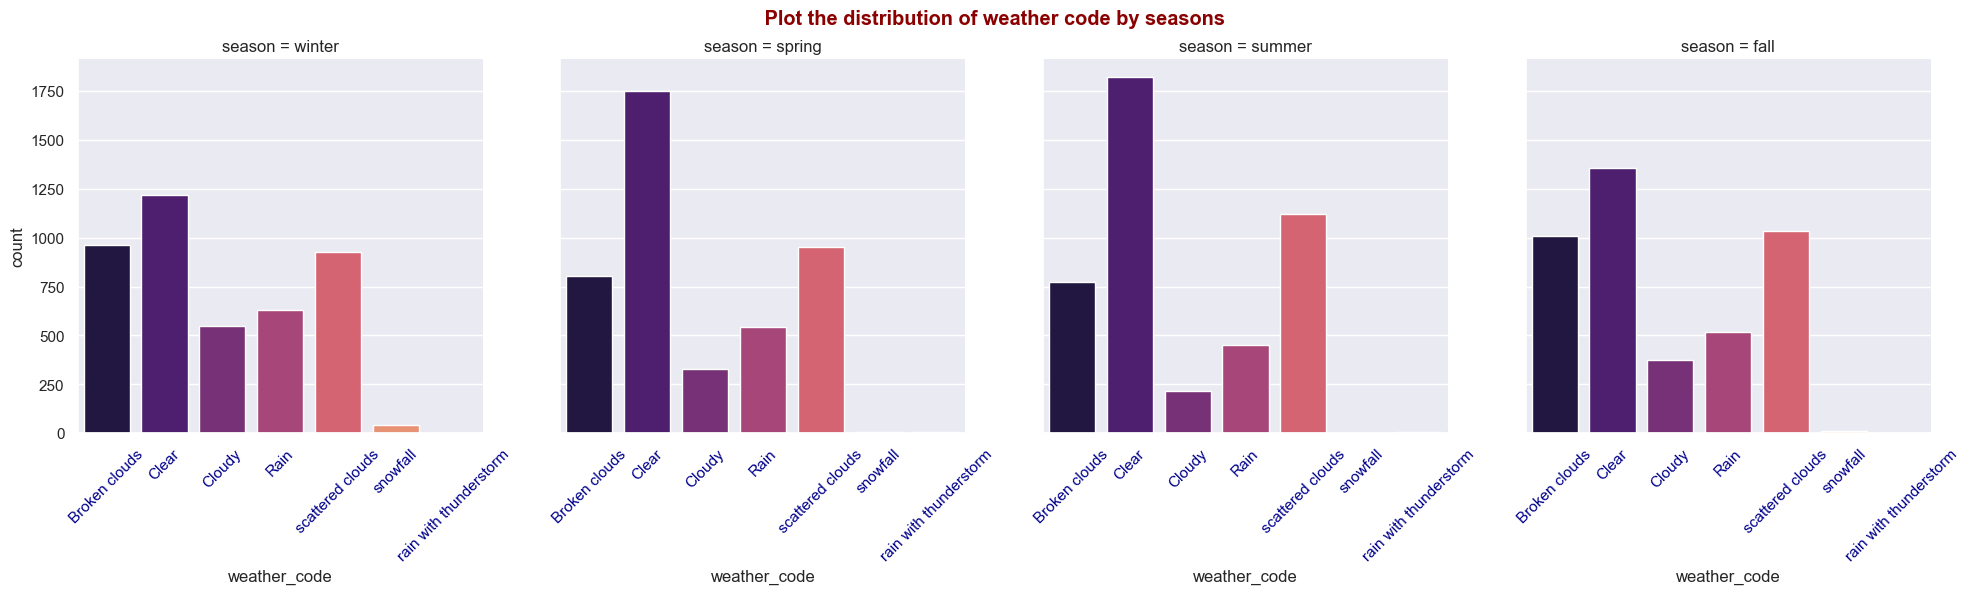

In [336]:
ax = sns.catplot(x="weather_code", data=df, kind="count", col="season",palette="magma")
plt.suptitle(' Plot the distribution of weather code by seasons',color="darkred",fontweight= "bold")  
ax.set_xticklabels(rotation=45, color='darkblue')
plt.subplots_adjust(top=0.88);

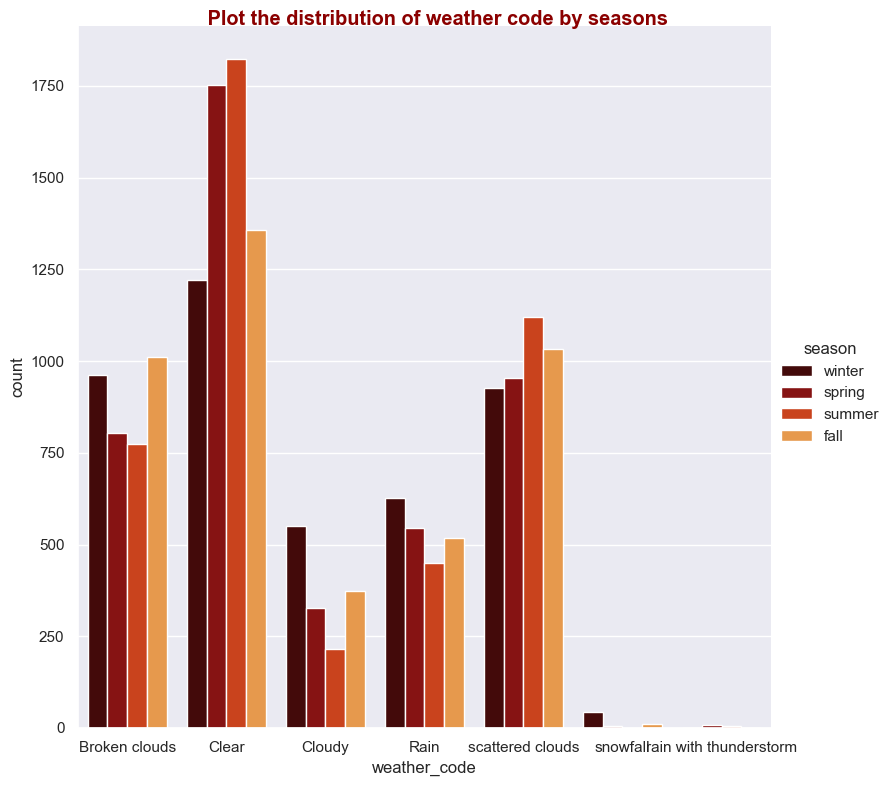

In [337]:
sns.catplot(x="weather_code", data=df, kind="count", hue="season", height=8,palette="gist_heat")
plt.suptitle(' Plot the distribution of weather code by seasons',color="darkred",fontweight= "bold")  
plt.subplots_adjust(top=0.96);

In [338]:
df_sumw=df.groupby("weather_code").cnt.sum()
df_sumw

weather_code
Broken clouds             4243887
Clear                     7146847
Cloudy                     929978
Rain                      1526461
rain with thunderstorm       8168
scattered clouds          6035580
snowfall                    15051
Name: cnt, dtype: int64

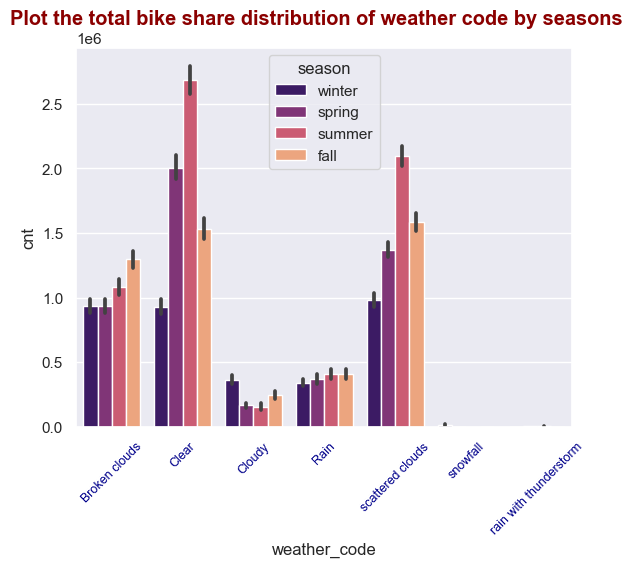

In [339]:
ax = sns.barplot(data=df,x="weather_code",y="cnt", hue="season",estimator=sum, palette="magma")
plt.suptitle('Plot the total bike share distribution of weather code by seasons',color="darkred",fontweight= "bold")  
    
plt.xticks(rotation=45, color='darkblue')
plt.tick_params(axis='x', labelsize=9)
plt.subplots_adjust(top=0.9);

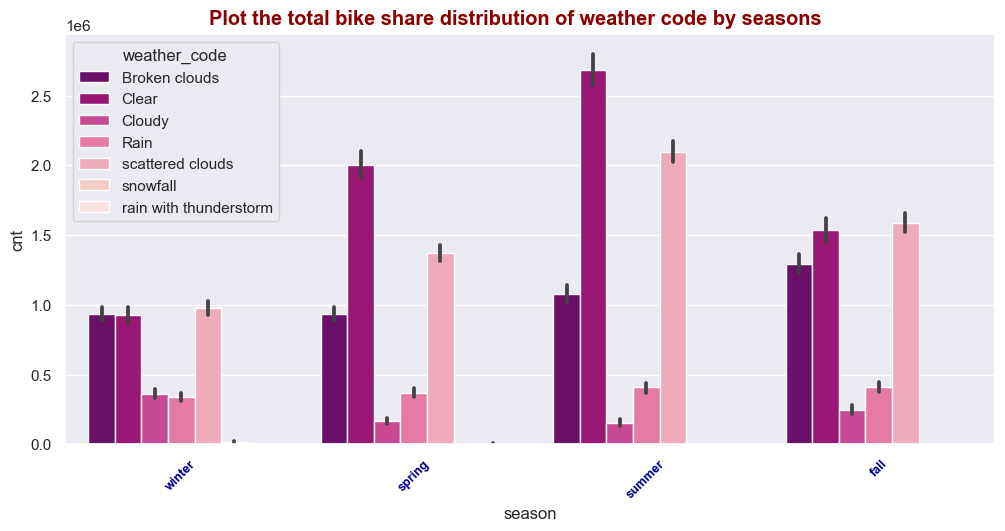

In [340]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.barplot(x="season", data=df, y="cnt", hue="weather_code",palette="RdPu_r",estimator=sum)
plt.suptitle('Plot the total bike share distribution of weather code by seasons',color="darkred",fontweight= "bold")  
    
plt.xticks(rotation=45, color='darkblue', fontweight= "bold")
plt.tick_params(axis='x', labelsize=9)
plt.subplots_adjust(top=0.93);

<div class="alert alert-warning alert-info">
<span style=" color:red">17. Additional Plot the distribution of the count of a new bike shares by temperature(t1,t2)
</span>


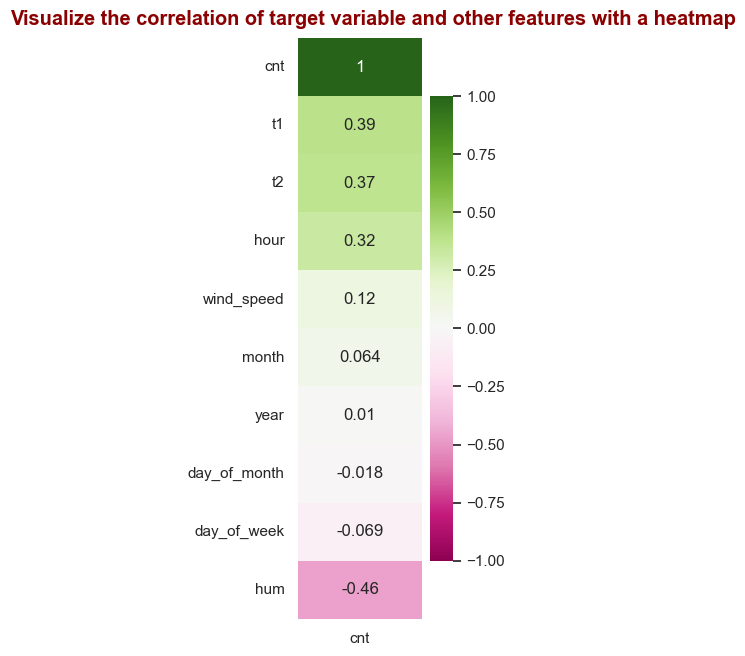

In [341]:
plt.figure(figsize=(2,7))
plt.suptitle('Visualize the correlation of target variable and other features with a heatmap',color="darkred",fontweight= "bold")  
sns.heatmap(df_corr, annot=True, cmap="PiYG",vmin=-1, vmax=1)
plt.subplots_adjust(top=0.94);

In [342]:
df.t1

0        3.0
1        3.0
2        2.5
3        2.0
4        2.0
        ... 
17409    5.0
17410    5.0
17411    5.5
17412    5.5
17413    5.0
Name: t1, Length: 17414, dtype: float64

In [343]:
df_sumt=df.groupby("t1").cnt.sum()
df_sumt

t1
-1.5       426
-1.0      7046
-0.5     14689
 0.0     24250
 0.5     13437
         ...  
 32.0    10420
 32.5    12215
 33.0     6777
 33.5     7362
 34.0     9221
Name: cnt, Length: 73, dtype: int64

In [344]:
df_sumt.max()

981231

In [345]:
df_sumt.value_counts

<bound method IndexOpsMixin.value_counts of t1
-1.5       426
-1.0      7046
-0.5     14689
 0.0     24250
 0.5     13437
         ...  
 32.0    10420
 32.5    12215
 33.0     6777
 33.5     7362
 34.0     9221
Name: cnt, Length: 73, dtype: int64>

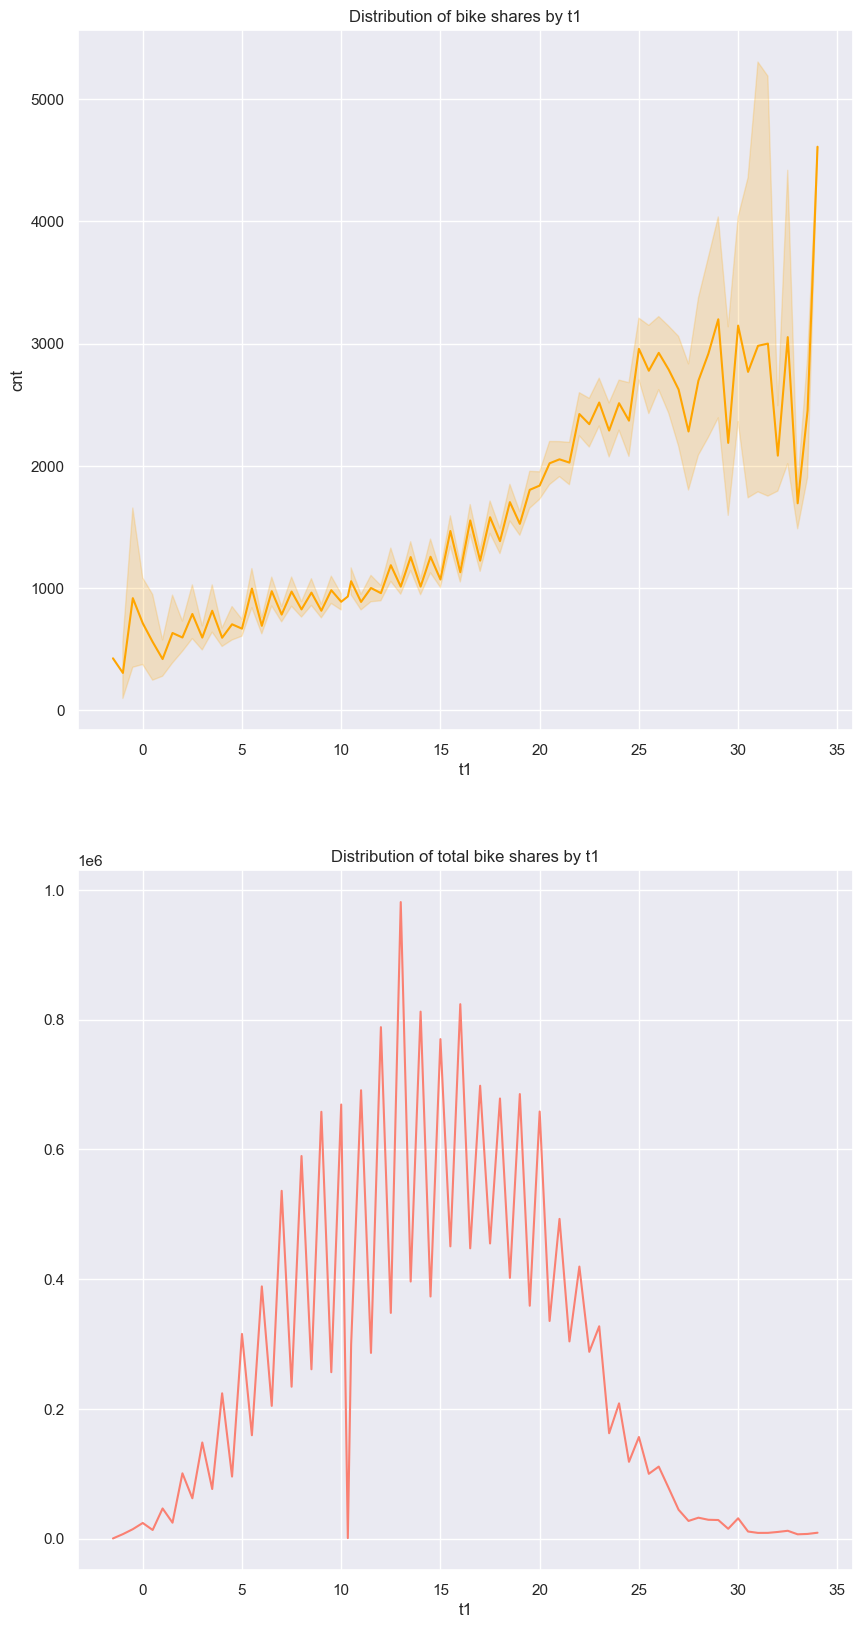

In [346]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

# line chart
sns.lineplot(data= df ,x="t1", y="cnt",ax=ax[0],color= "orange")
ax[0].set_title('Distribution of bike shares by t1')

sns.lineplot(data= df_sumt ,x=df_sumt.index, y=df_sumt.values,ax=ax[1],color="salmon")
ax[1].set_title('Distribution of total bike shares by t1')

# Display the plots  
plt.show()

In [347]:
df_sumt[df_sumt==df_sumt.max()]

t1
13.0    981231
Name: cnt, dtype: int64

In [348]:
df_sumt[df_sumt==df_sumt.min()]

t1
-1.5    426
Name: cnt, dtype: int64

In [349]:
#It is seen that it reaches the maximum value when t1 is 13 degrees. Considering that London averages between 10 and 15 degrees
#Celsius in spring and autumn, it is usual to maximize cycling at 13 degrees Celsius.

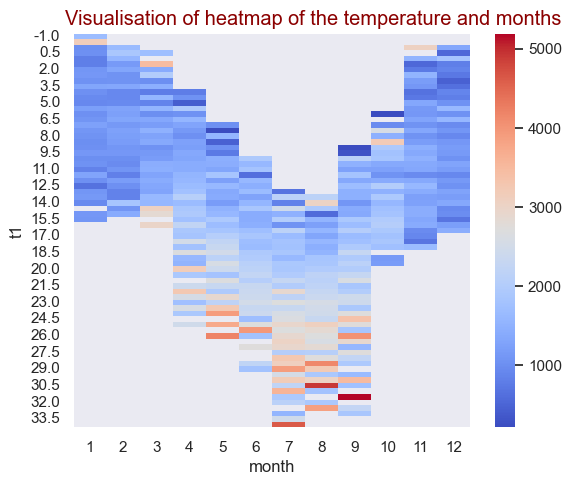

In [360]:
#Lets create a heatmap of the temperature and months to see how affected.
ax =sns.heatmap(pd.pivot_table(data=df[df[ 'hour']>6],
index='t1',
columns='month',
values='cnt',
aggfunc='mean'), cmap= 'coolwarm')
ax.set_xticklabels(df.month.unique())
plt.xticks ()
plt.suptitle('Visualisation of heatmap of the temperature and months',color="darkred") 
plt.subplots_adjust(top=0.93);

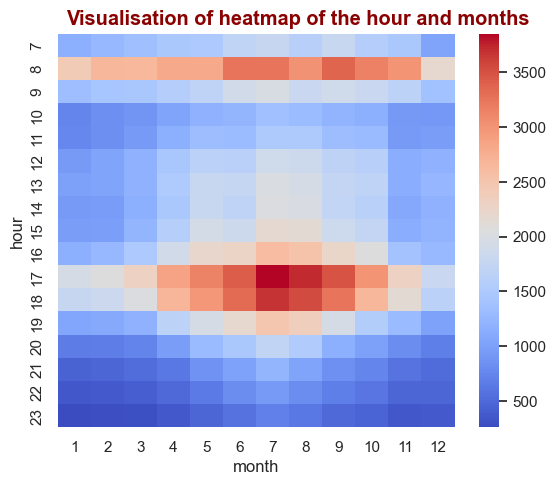

In [359]:
#Lets create a heatmap of the hour and months to see how riders are affected.
ax =sns.heatmap(pd.pivot_table(data=df[df[ 'hour']>6],
index='hour',
columns='month',
values='cnt',
aggfunc='mean'), cmap= 'coolwarm')
ax.set_xticklabels(df.month.unique())
plt.suptitle('Visualisation of heatmap of the hour and months',color="darkred",fontweight= "bold") 
plt.subplots_adjust(top=0.93);

In [352]:
#In 8 a.m. and 17,18 p.m., and in the 7th and 8th month, the usage of bicycle intensified.

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

In [353]:
#In both years, the use of bicycle reaches its maximum in June,July,August which are months of summer season
#and falls to a minimum in December,January,February which are months of winter season.

In [354]:
# It is seen that Bicycle use is concentrated during commuting and rush hours which are 8 in the morning and 17 in the evening.

In [355]:
#Temperature(t1=0.39) and hour(0.32) have the highest correlation with the count of a new bike shares.

In [356]:
#It is clear from the negative correlation in humidity(-0.46) that the count of a new bike shares decreases when humidity increases.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>